# Exercice 1 - Prédiction 

In [ ]:
import base
import numpy as np
from base import *

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline



## Création d'une politique pour Maze

In [ ]:
#créer une politique pour Maze

env=base.Maze()
ns = env.get_nb_states()
na = env.get_nb_actions()
policy=np.ones((ns, na))
for i in range(ns):
  policy[i]=[0.1,0.4,0.4,0.1]
policy

array([[0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1],
       [0.1, 0.4, 0.4, 0.1]])

## Implémentation de l'algorithme Monte Carlo

In [ ]:
def monte_carlo(env, gamma, nb_episodes):
    nba = env.get_nb_actions()
    v = np.zeros(env.get_nb_states())
    n = np.zeros(env.get_nb_states())
    S = np.zeros(env.get_nb_states())

    for ne in range(nb_episodes):
        state = env.reset()
        episode = []
        while not env.is_final(state):
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            episode.append([state, action, r, nvstate])
            state = nvstate
            
        g = 0 # retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s] += 1
            S[s]+=g
            v[s]= S[s]/n[s]
                
    return v

## Implémentation de l'algorithme TD(0)

In [ ]:
def TD_zero(env, gamma, alpha, nb_episodes):
    nba = env.get_nb_actions()
    v = np.zeros(env.get_nb_states())

    for ne in range(nb_episodes):
        state = env.reset()
       
        while not env.is_final(state):
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, final, _ = env.step(action)
                        
            if final:
                target = r
            else:
                target = r + gamma * v[nvstate]
        
            v[state] += alpha * (target - v[state])
            
            state = nvstate
    
    return v


## Implémentation de l'algorithme IPE

In [ ]:
def compute_q(values, env, gamma):
    return np.sum(env.p()*(env.r() + gamma * values[np.newaxis, np.newaxis, :]), axis=2)


def ipe(pi, env, gamma, epsilon=0.01):
    v = np.zeros(env.get_nb_states())

    q = compute_q(v, env, gamma)
    nv = np.sum(pi * q, axis=1)
    delta = np.sum(np.abs(nv-v))
    
    while delta > epsilon:
        v = nv
        q = compute_q(v, env, gamma)
        nv = np.sum(pi * q, axis=1)
        delta = np.sum(np.abs(nv-v))
        
    return nv

In [ ]:
monte_carlo(env,0.5,100)

array([ 13.2468499 ,  42.78143122, 162.09609593,   0.        ,
         4.4758576 ,   0.        ,  48.50421404,   0.        ,
        12.42979416,  47.43431168, 133.96424411,   0.        ,
         1.22571774,   0.        , 561.63973277,   0.        ])

In [ ]:
ipe(policy,env,0.5,0.01)

array([ 11.59279286,  49.16764138, 181.48179409,   0.        ,
         3.00185758,   0.        ,  49.74737104,   0.        ,
         8.36084783,  38.20592509, 141.18327338,   0.        ,
         0.75939102,   0.        , 542.745494  ,   0.        ])

##Calcul de l'erreur de prédiction

###Monte-Carlo

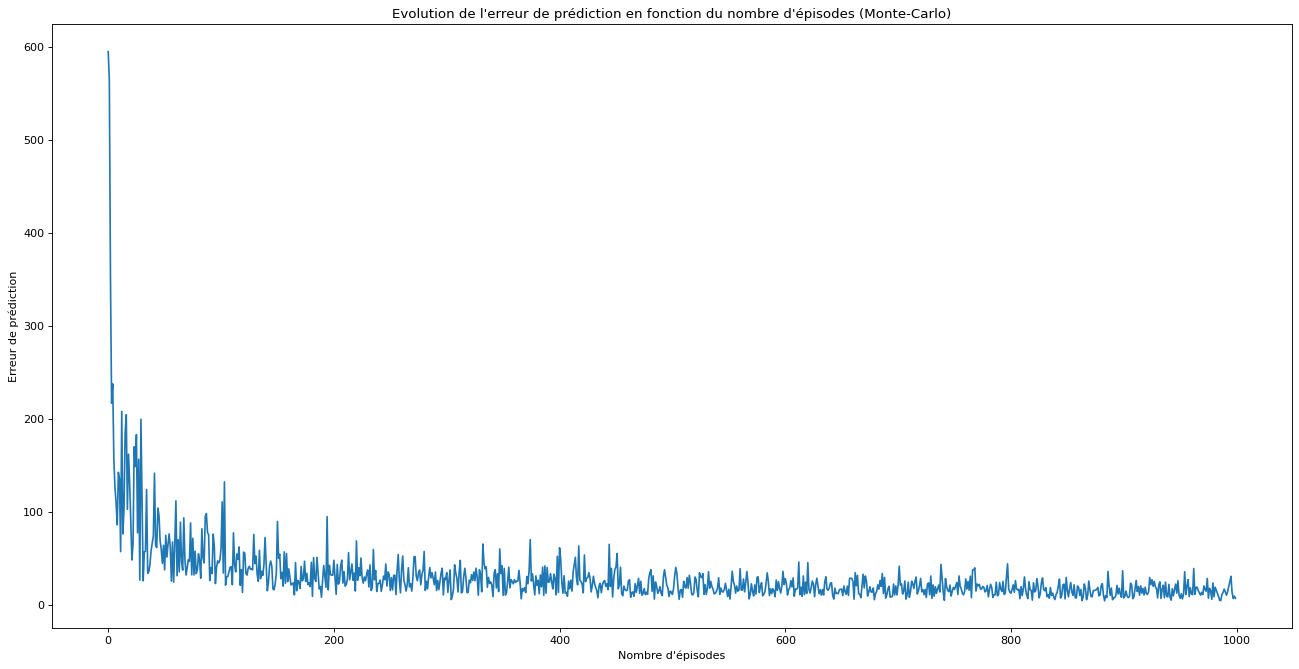

In [ ]:
IPE=ipe(policy,env,0.5,0.01)
dist=[]
for i in range(1000):
  MC=monte_carlo(env,0.5,i)
  dist.append(abs(np.linalg.norm(IPE-MC)))

figure(figsize=(20, 10), dpi=80)
plt.plot(dist)
plt.xlabel('Nombre d\'épisodes')
plt.ylabel('Erreur de prédiction')
plt.title('Evolution de l\'erreur de prédiction en fonction du nombre d\'épisodes (Monte-Carlo)')
plt.show()

**On voit que la courbe converge vers 0 au fil des épisodes. 
On observe aussi des fluctuations dans le taux d'erreur et cela est dû au fait que le tirage des actions est aléatoire sur des propabilités d'une politique donné. 
La variance de ces fluctuations diminue au fil des épisodes.** 

###TD(0)

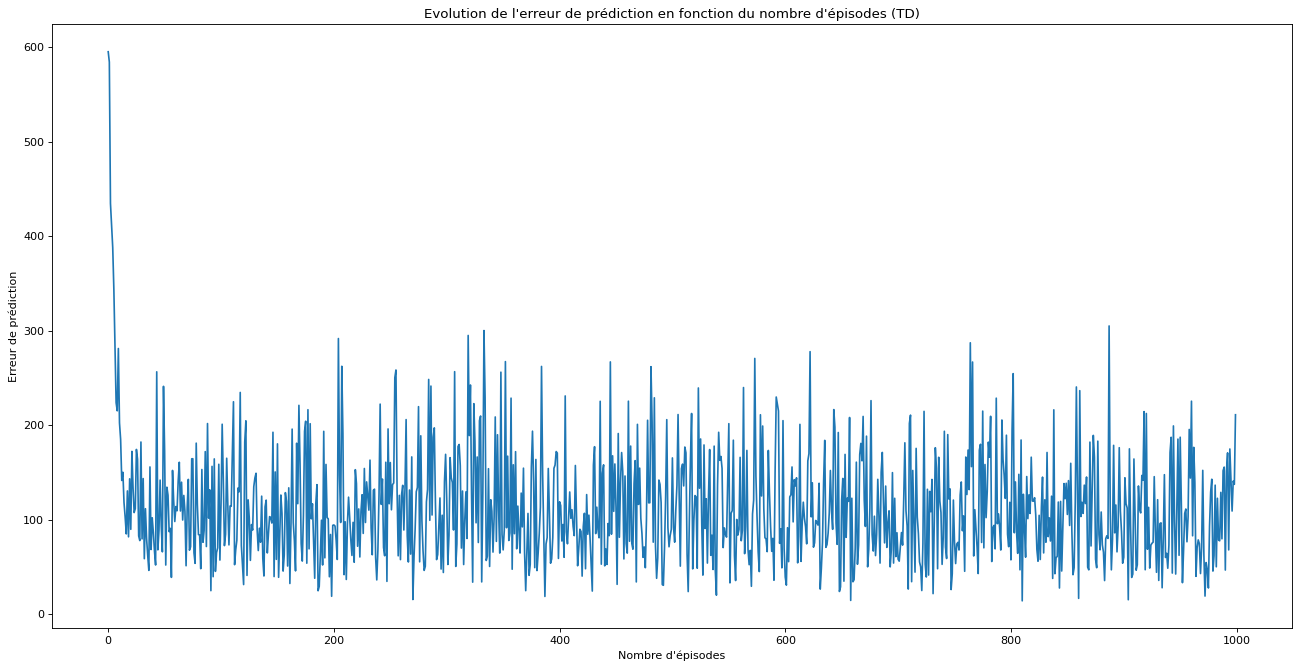

In [ ]:
IPE=ipe(policy,env,0.5,0.01)
dist_td=[]
for i in range(1000):
  TD = TD_zero(env,0.5,0.1,i)
  dist_td.append(abs(np.linalg.norm(IPE-TD)))

figure(figsize=(20, 10), dpi=80)
plt.plot(dist_td)
plt.xlabel('Nombre d\'épisodes')
plt.ylabel('Erreur de prédiction')
plt.title('Evolution de l\'erreur de prédiction en fonction du nombre d\'épisodes (TD)')
plt.show()

**On voit que la courbe de convergence de l'algorithme TD(0) est légèrement différente de celle de Monte Carlo. Elle converge moins rapidement vers 0 et les fluctuations sont plus importantes avec une variance qui ne diminue pas de la même manière qu'avec Monte Carlo.**

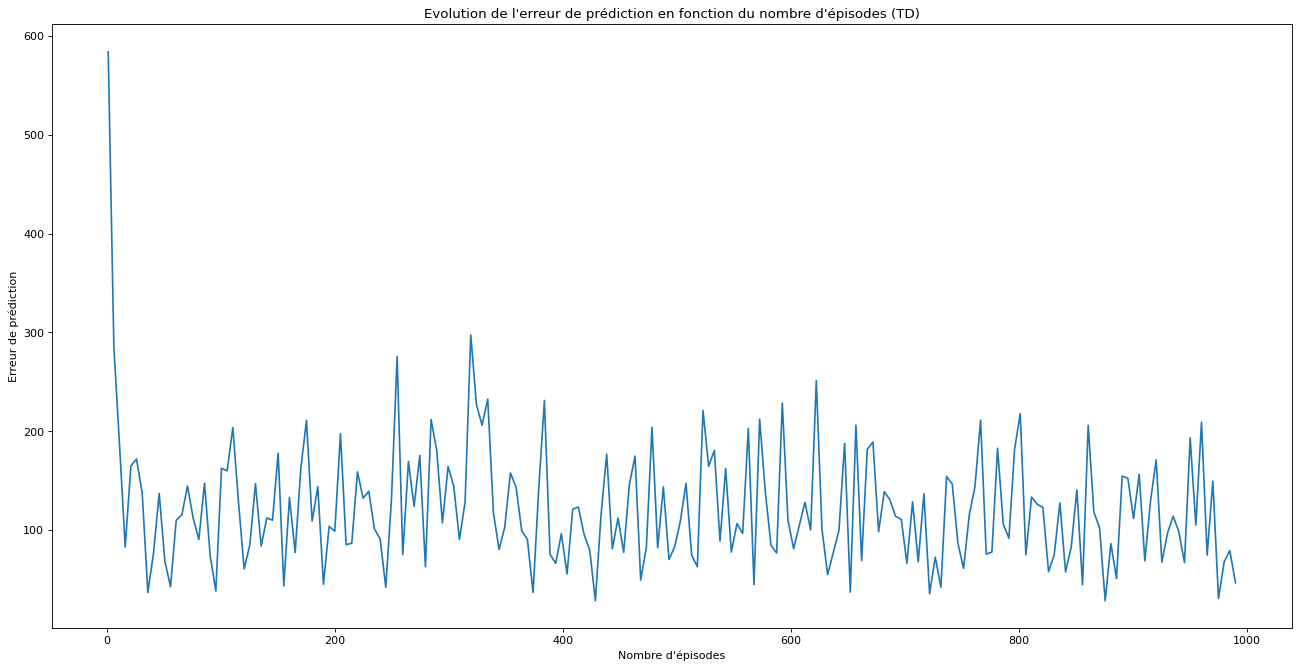

In [ ]:
model=make_interp_spline(range(1000), dist_td)

xs=np.linspace(1,990,200)
ys=model(xs)

figure(figsize=(20, 10), dpi=80)
plt.plot(xs,ys)
plt.xlabel('Nombre d\'épisodes')
plt.ylabel('Erreur de prédiction')
plt.title('Evolution de l\'erreur de prédiction en fonction du nombre d\'épisodes (TD)')
plt.show()

**Le graphe ci dessus montre la courbe lissée de l'évolution de l'erreur de prédiction en fonction du nombre d'épisodes avec l'algorithme TD(0).** 

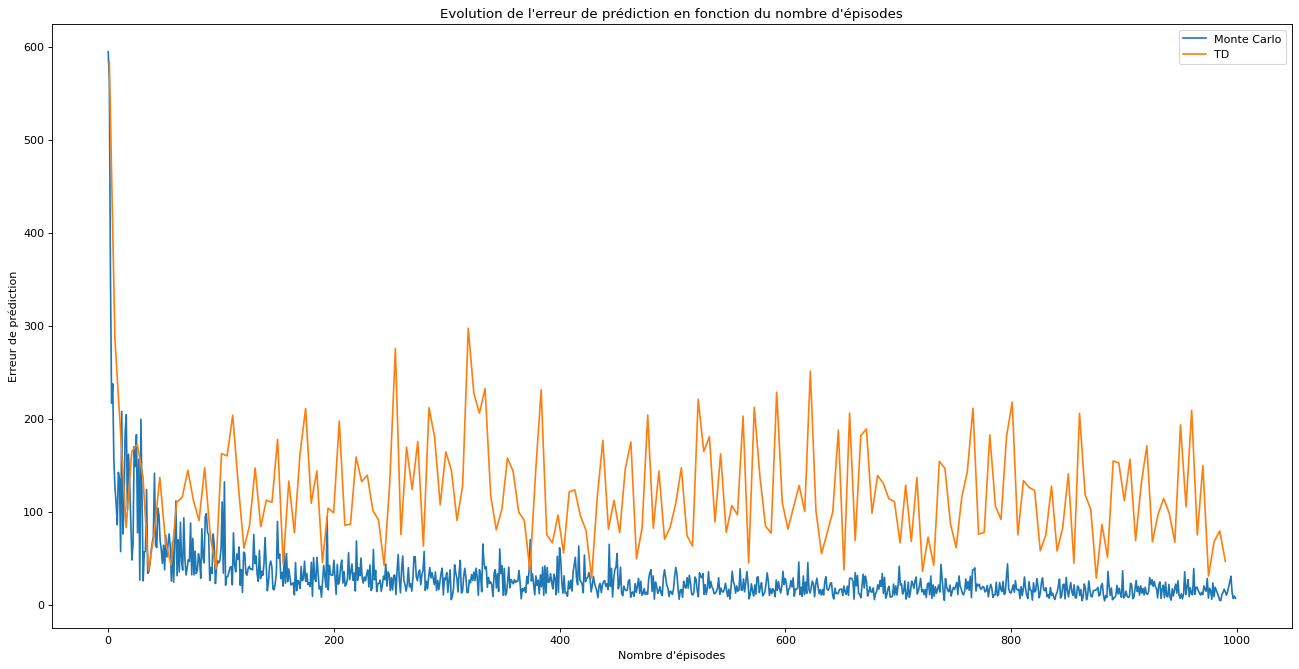

In [ ]:
figure(figsize=(20, 10), dpi=80)
plt.plot(dist,label='Monte Carlo')
plt.plot(xs,ys,label='TD')
plt.xlabel('Nombre d\'épisodes')
plt.ylabel('Erreur de prédiction')
plt.title('Evolution de l\'erreur de prédiction en fonction du nombre d\'épisodes')
plt.legend()
plt.show()

**Le graphique ci dessus nous montre clairement que Monte Carlo est meilleur en terme de prédiction que TD(0) sur l'environnement Maze avec notre politique. Ce qui est plutot cohérent, étant donné que Monte Carlo attend la fin des épisodes pour mettre à jours les valeurs des états alors que TD(0) effectue ces mises à jours durant l'épisode à chaque itération.** 

##Implémentation  de TD avec n_step

In [ ]:
def TD_n(env, gamma, alpha, nb_episodes,n_step):
    nba = env.get_nb_actions()
    v = np.zeros(env.get_nb_states())

    for ne in range(nb_episodes):
        state = env.reset()
        episode = []
        T=99999
        t=0

        while not env.is_final(state):
            tau= t-n_step+1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, final, _ = env.step(action)
            episode.append([state, action, r, nvstate])

            if final:
              T=t+1
            
            c= tau + n_step
            if tau>=0:
              G = sum(gamma**(i-tau-1) * episode[i][2] for i in range(min(tau+n_step,T)))
              if c < T and tau+n_step<len(episode):
                G+= gamma**(n_step) * v[episode[tau+n_step][0]] 
              if tau<=T-1:
                v[episode[tau][0]] += alpha * (G - v[episode[tau][0]])

            state = nvstate
            t+=1  
    return v       

In [ ]:
TD_n(env,0.5,0.1,100,2)

array([  0.        ,  36.38177657,  51.48251685,   0.        ,
         0.        ,   0.        ,  64.98662098,   0.        ,
         0.        ,   0.        , 338.01912548,   0.        ,
         0.        ,   0.        , 244.89537541,   0.        ])

# Exercice 2 - Contrôle

## Maze

In [ ]:
import base
env = base.Maze()

### Epsilon variable dans le temps

Définition de notre epsilon

In [ ]:
import math

def epsilon(t, epsilon0, T):
  if t <= T:
    return epsilon0

  return epsilon0 / math.sqrt(t - T)

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_episodes(reinforcements, nb_actions):
  plt.figure(figsize=(15, 6))
  plt.subplot(121)
  plt.plot(reinforcements)
  yhat = savgol_filter(reinforcements, 101, 1)
  plt.plot(yhat, color='red')
  plt.title("Renforcement total par épisode")
  plt.xlabel("épisodes")
  plt.ylabel("renforcement total")
  plt.subplot(122)
  plt.plot(nb_actions)
  plt.title("Nombre d'étapes par épisode")
  plt.xlabel("épisodes")
  plt.ylabel("Nb d'étapes")

Code pour les méthodes Monte-Carlo Control, SARSA, Q-Learning

In [ ]:
import base
import numpy as np

def greedy_policy(qvalues):
    policy = np.zeros(qvalues.shape)
    for s, va in enumerate(qvalues):
        policy[s ,np.argmax(va)] = 1
    return policy


def egreedy_policy(qvalues, epsilon):
    # qvalues matrice nb_etat * nb_actions
    nb_actions = qvalues.shape[1]
    policy = np.ones(qvalues.shape) * epsilon / nb_actions
    for s, va in enumerate(qvalues):
        policy[s, np.argmax(va)] += 1 - epsilon
    return policy


def egreedy_decision(qvalues, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, qvalues.shape[1])
    else:
        return np.argmax(qvalues[state])


def monte_carlo(env, gamma, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))

    list_reinforcements = []
    list_nb_etapes = []

    policy = np.ones((env.get_nb_states(), nba)) / nba

    for ne in range(nb_episodes):        
        state = env.reset()
        episode = []
        
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i += 1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            episode.append([state, action, r, nvstate])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        g = 0  #le retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s, a]) / n[s, a]

        policy = egreedy_policy(q, epsilon(ne, epsilon0, T))

    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def sarsa(env, gamma, alpha, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        action = egreedy_decision(q, state, epsilon(ne, epsilon0, T))
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = egreedy_decision(q, nvstate, epsilon(ne, epsilon0, T))
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = egreedy_decision(q, state, epsilon(ne, epsilon0, T))
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q


#### Monte-Carlo Control

On lance l'algorithme avec différentes valeurs de epsilon0.

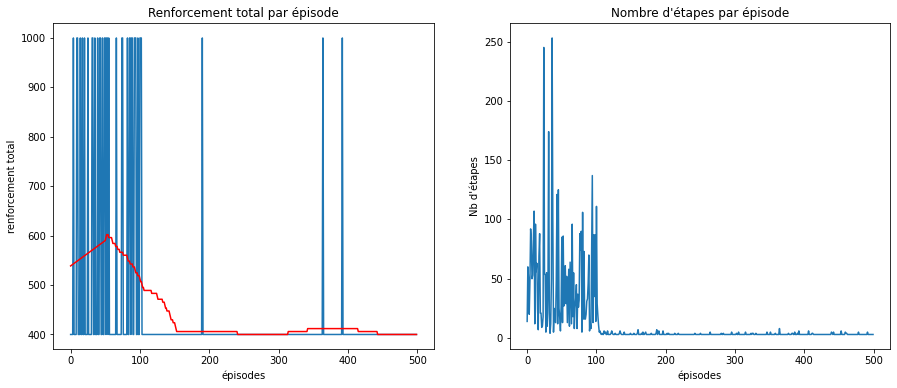

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 1, T = 100)

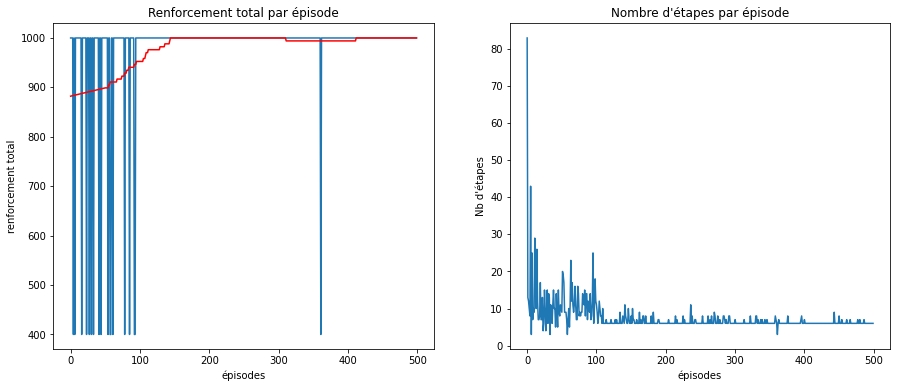

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 100)

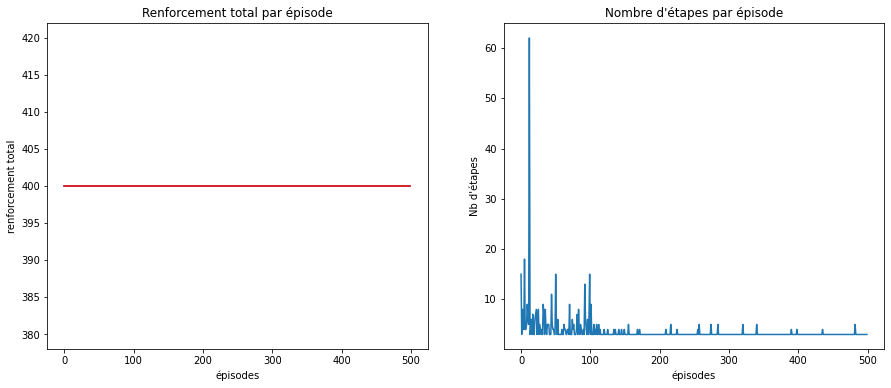

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.3, T = 100)

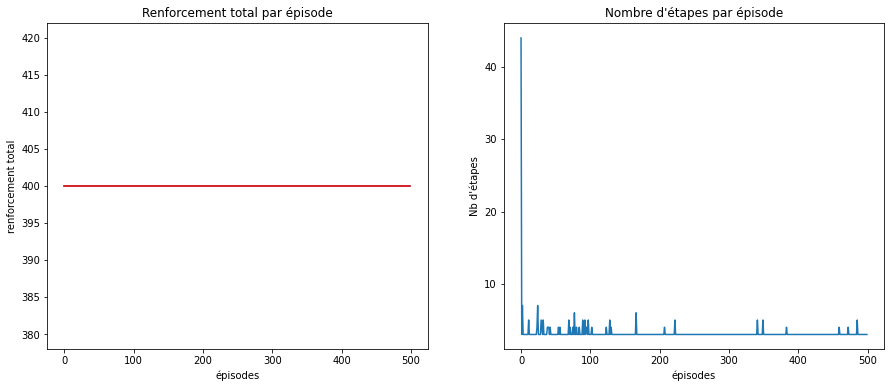

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.1, T = 100)

Un epsilon0 plus petit augmente la vitesse de convergence, mais au risque d'être dans un optimum local

On fait maintenant varier T.

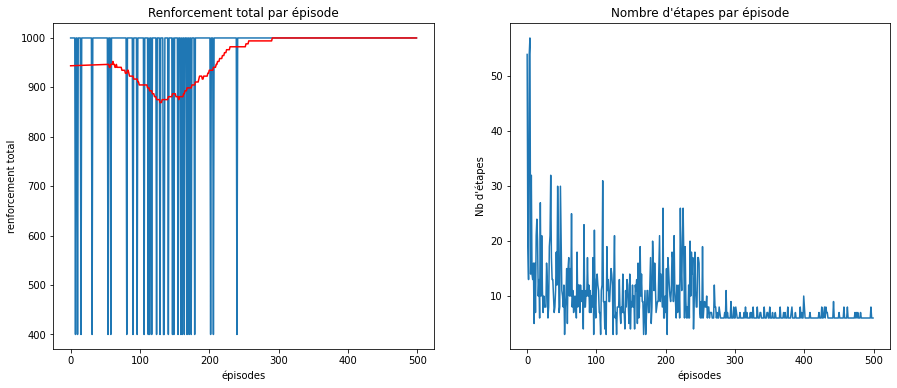

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 250)

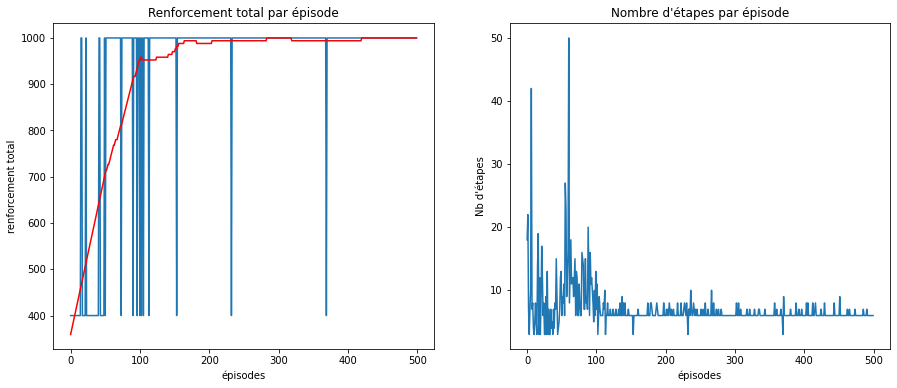

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 100)

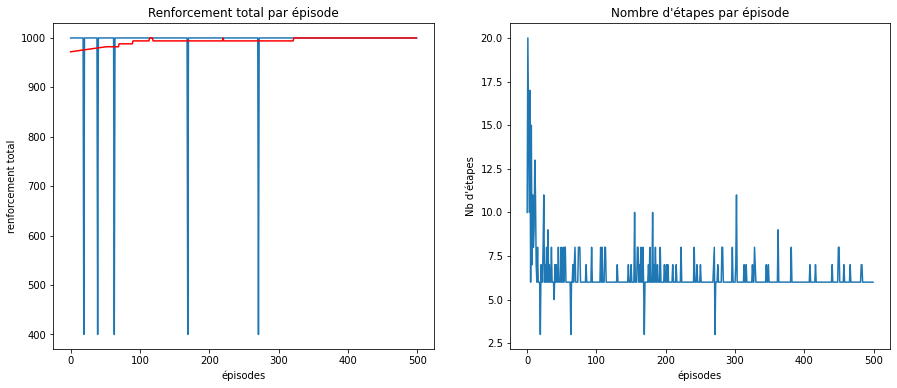

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 10)

Le nombre d'étapes par épisode chute à partir de T

#### SARSA

On fait varier epsilon0

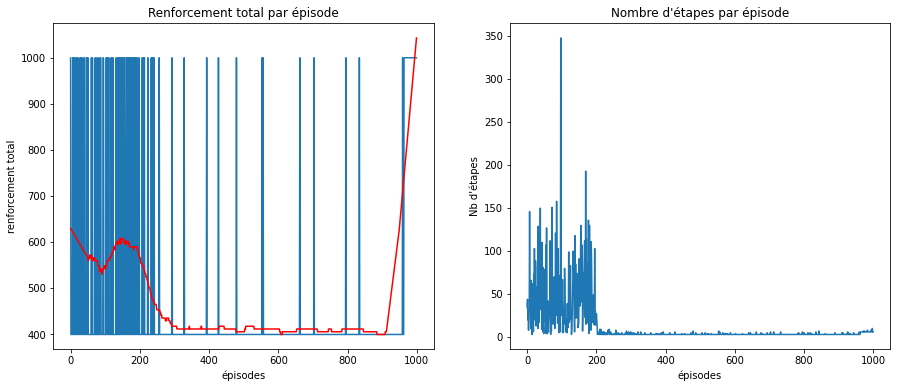

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=1, T=200)

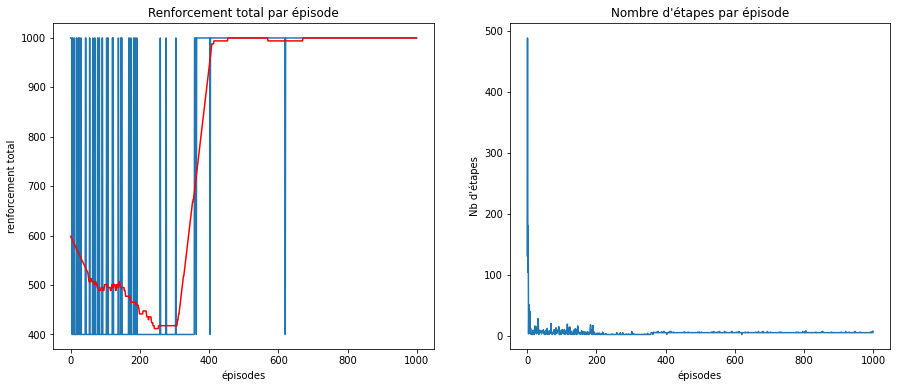

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=200)

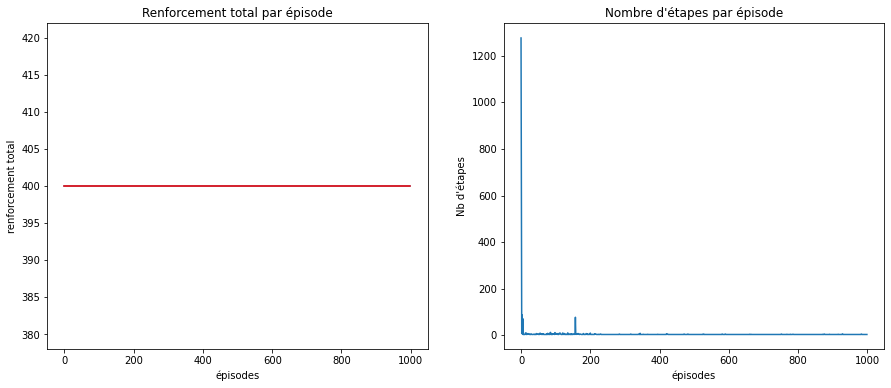

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.3, T=200)

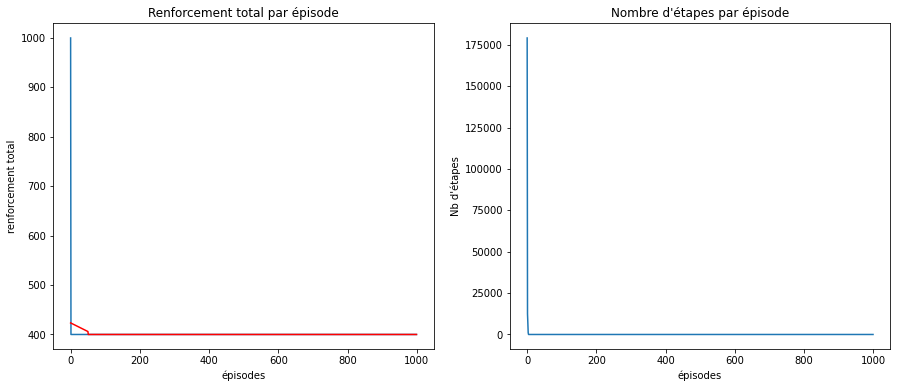

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.1, T=200)

On fait varier T

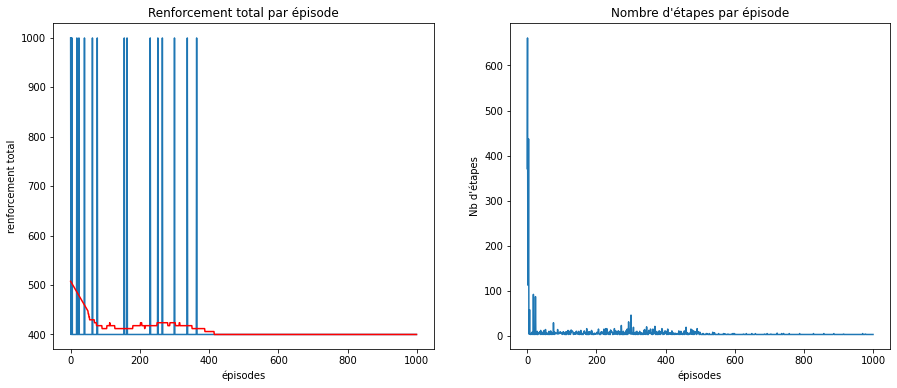

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=500)

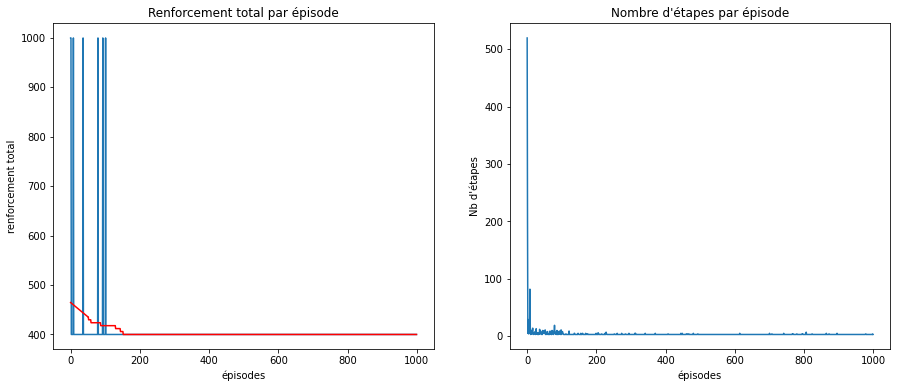

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=100)

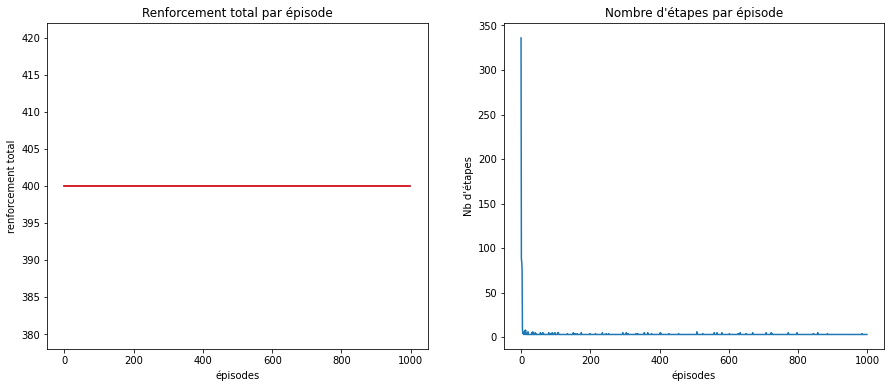

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=10)

#### Q-Learning

On fait varier epsilon0

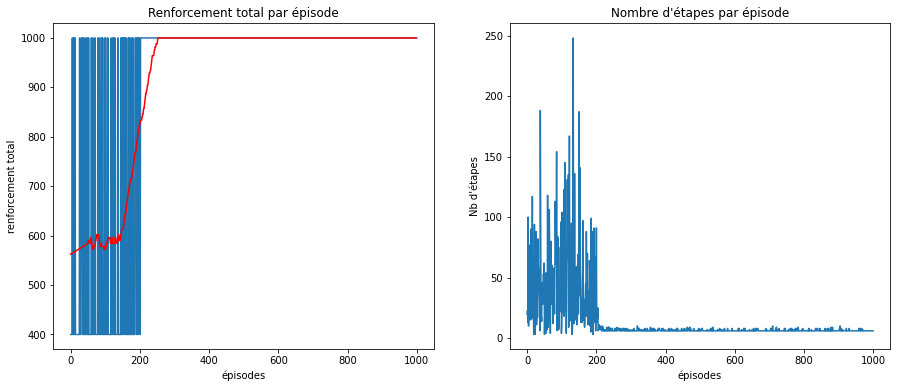

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=1, T=200)

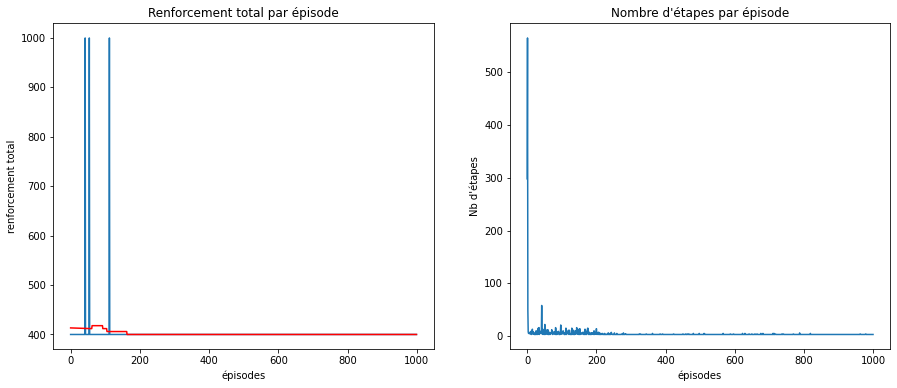

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=200)

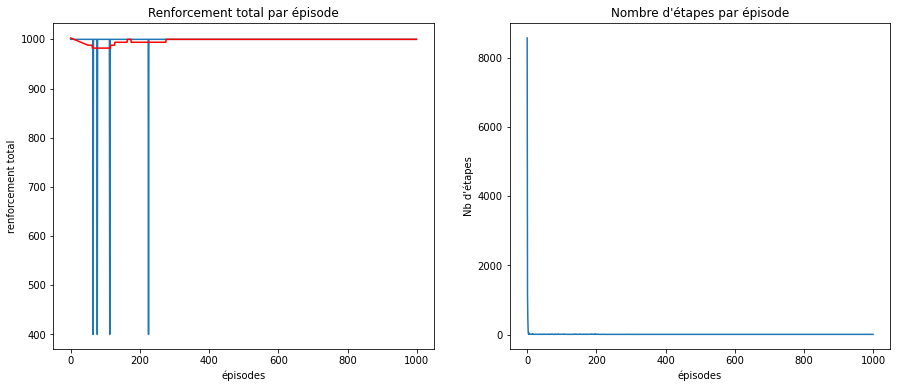

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.3, T=200)

On fait varier T

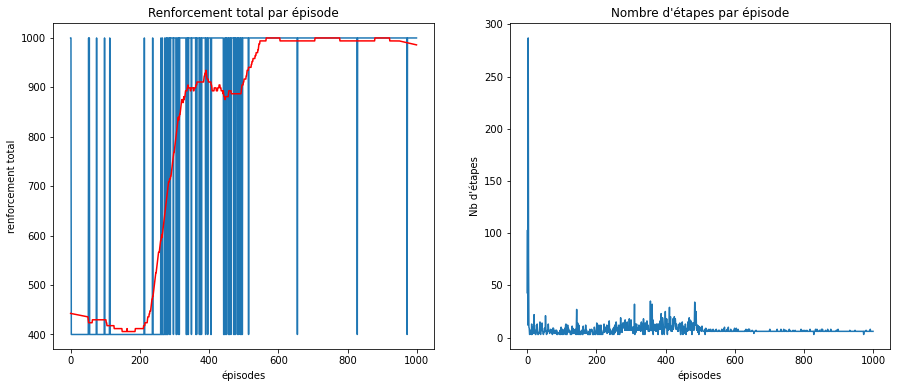

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=500)

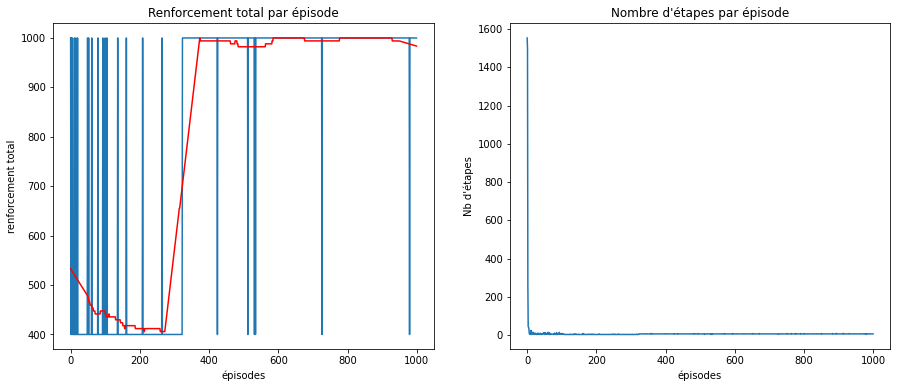

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=100)

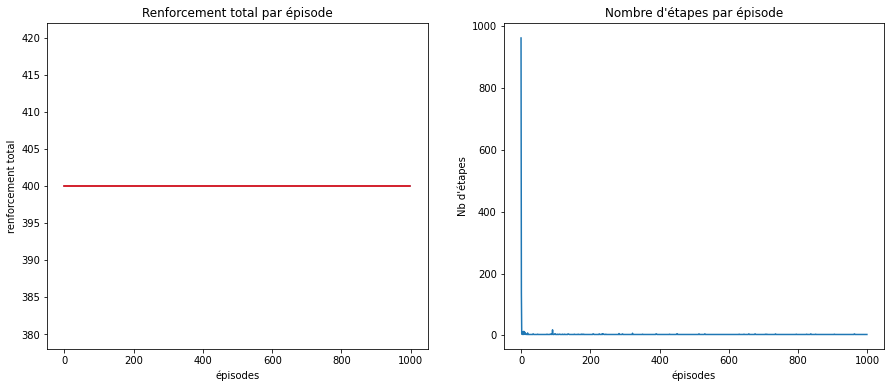

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=10)

### Softmax

In [ ]:
from scipy.special import softmax

def softmax_policy(qvalues, T):
    return softmax(qvalues / T, axis=1)

def softmax_decision(qvalues, state, T):
    nb_actions = qvalues.shape[1]
    probs = softmax(qvalues[state] / T)
    return np.random.choice(nb_actions, p=probs)

Il faut redéfinir MC-Control, SARSA et Q-Learning

On choisit T = T0 / sqrt(t)

In [ ]:
import base
import numpy as np

def monte_carlo(env, gamma, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))

    list_reinforcements = []
    list_nb_etapes = []

    policy = np.ones((env.get_nb_states(), nba)) / nba

    for ne in range(nb_episodes):        
        state = env.reset()
        episode = []
        
        T = T0 / math.sqrt(ne + 1)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i += 1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            episode.append([state, action, r, nvstate])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        g = 0  # g le retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s, a]) / n[s, a]

        policy = softmax_policy(q, T)

    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def sarsa(env, gamma, alpha, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        T = T0 / math.sqrt(ne + 1)
        state = env.reset()
        action = softmax_decision(q, state, T)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = softmax_decision(q, nvstate, T)
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        T = T0 / math.sqrt(ne + 1)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = softmax_decision(q, state, T)
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

#### Monte-Carlo Control

On fait varier T0 la température initiale

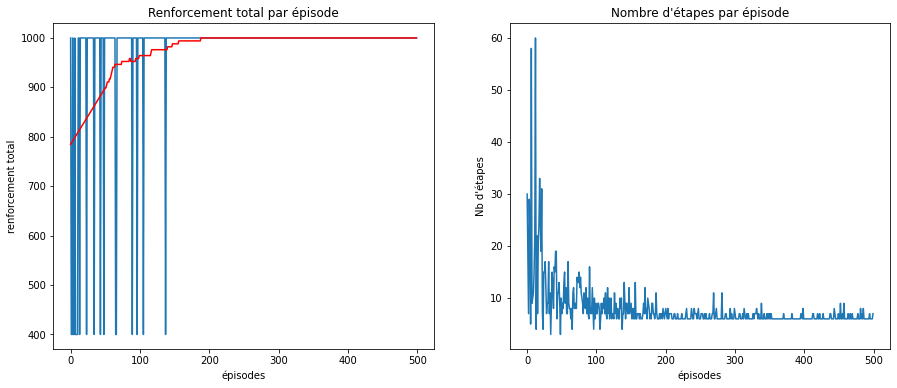

In [ ]:
res = monte_carlo(env, 0.9, 500, T0=1000)

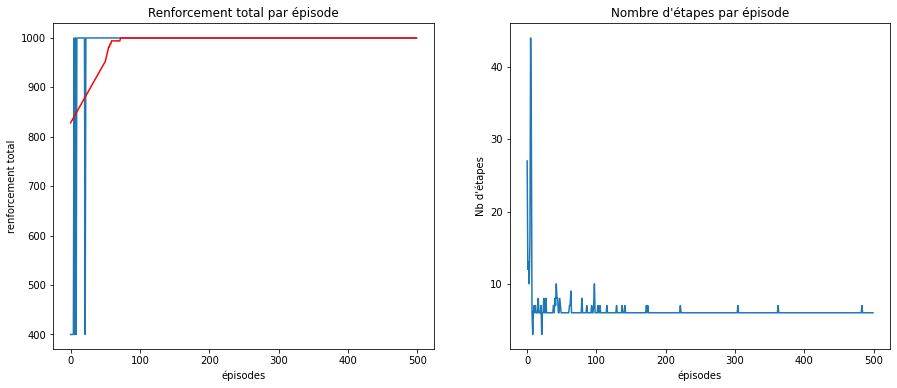

In [ ]:
res = monte_carlo(env, 0.9, 500, T0=500)

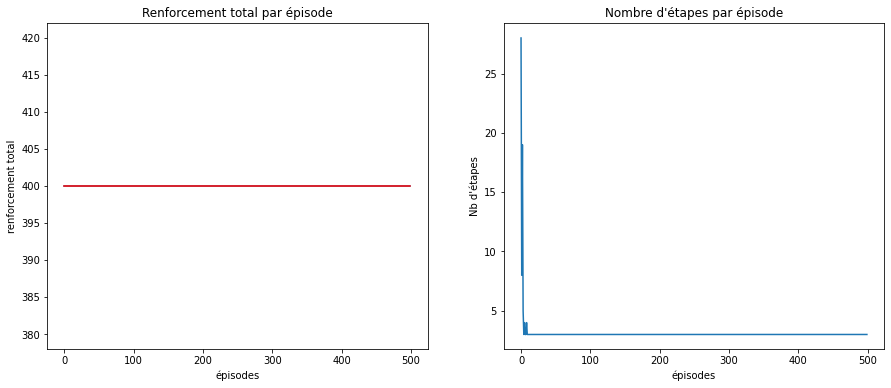

In [ ]:
res = monte_carlo(env, 0.9, 500, T0=100)

Plus T0 est grande, plus l'algorithme va explorer longtemps

#### SARSA

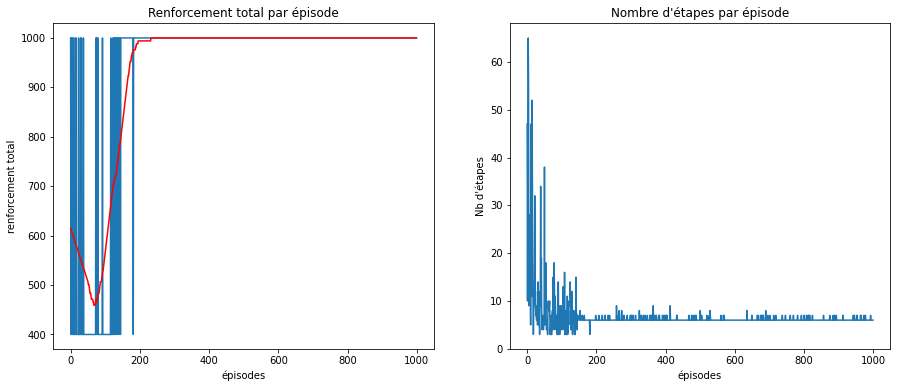

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=1000)

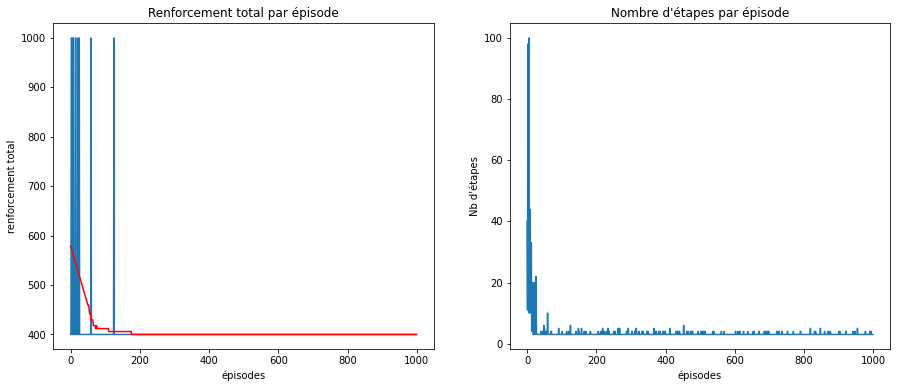

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=500)

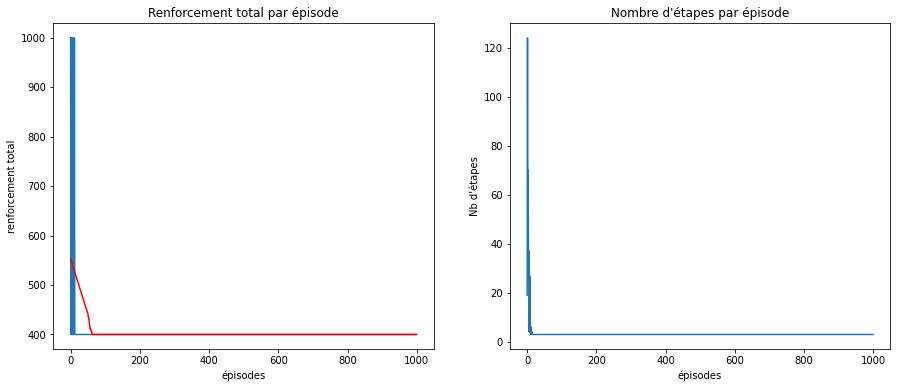

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=100)

#### Q-Learning

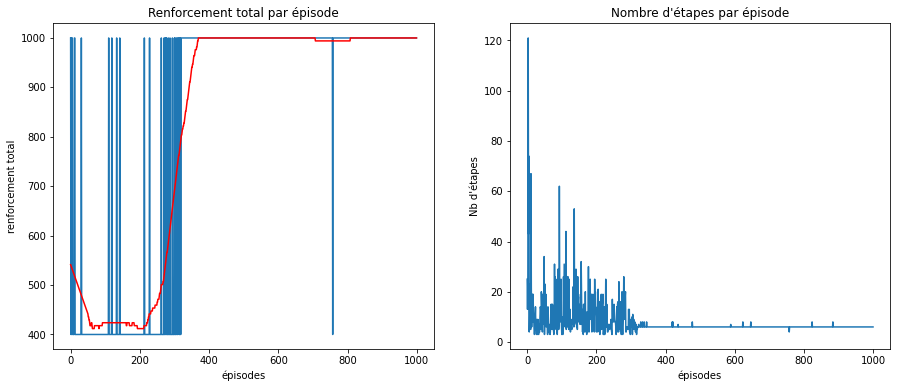

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, T0=1000)

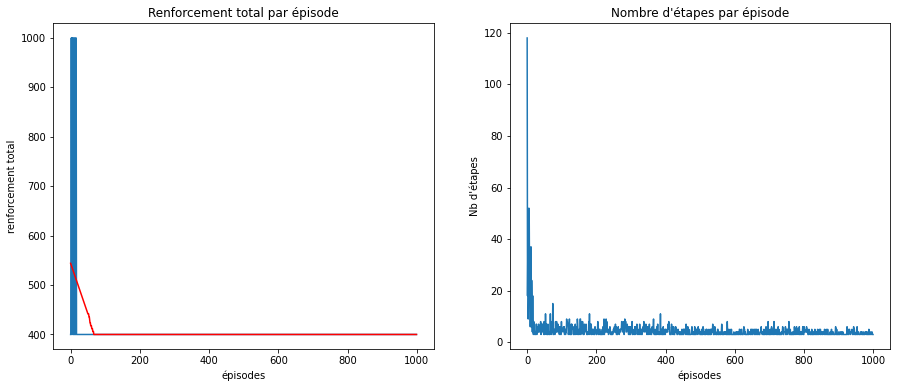

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, T0=500)

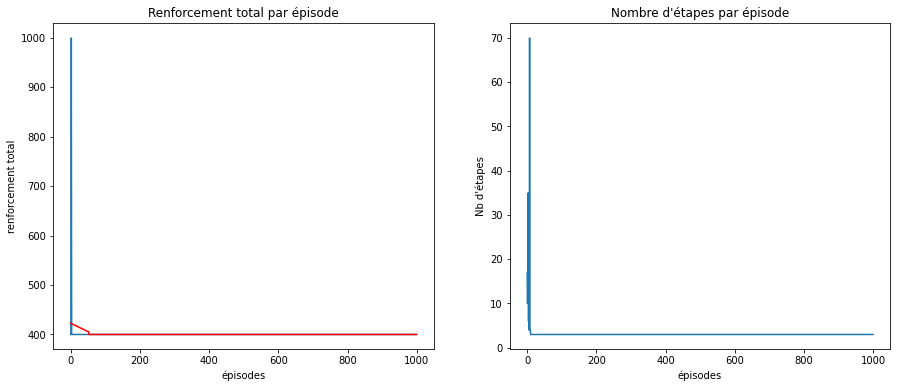

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, T0=100)

### Greedy avec une initialisation optimiste

On initialise les valeurs de q à Rmax / (1 - gamma)

In [ ]:
import base
import numpy as np

# Choisir quelle action faire en fct de l'etat
def greedy_decision(qvalues, state):
    return np.argmax(qvalues[state])


def sarsa(env, gamma, alpha, nb_episodes, rmax=1000):
    nba = env.get_nb_actions()
    q = np.full((env.get_nb_states(), nba), rmax / (1 - gamma))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        action = greedy_decision(q, state)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = greedy_decision(q, nvstate)
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, rmax=1000):
    nba = env.get_nb_actions()
    q = np.full((env.get_nb_states(), nba), rmax / (1 - gamma))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = greedy_decision(q, state)
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

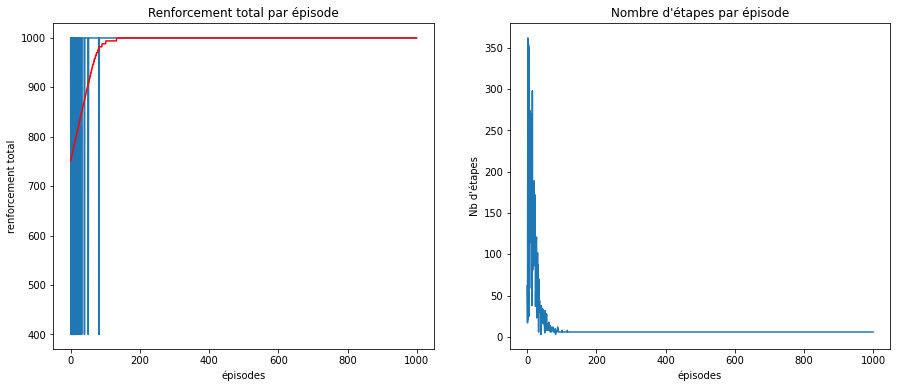

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, rmax=1000)

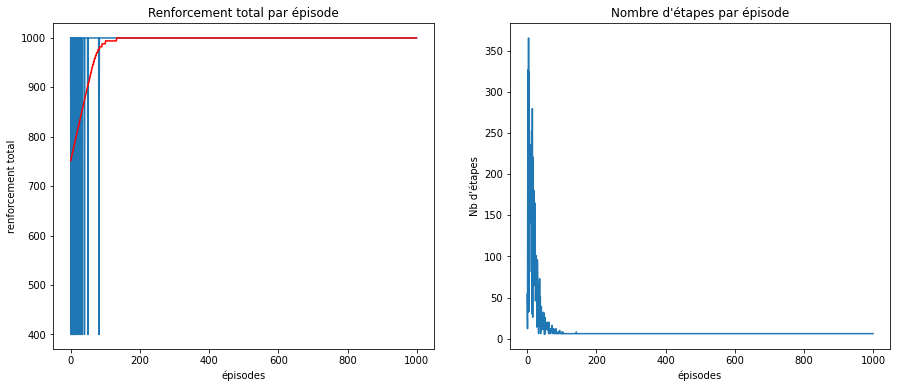

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, rmax=1000)

L'initialisation optimiste fonctionne bien et nous donne une convergence rapide.

## FrozenLake44

In [ ]:
env = base.FrozenLake44()

### Epsilon variable dans le temps

Définition de notre epsilon

In [ ]:
import math

def epsilon(t, epsilon0, T):
  if t <= T:
    return epsilon0

  return epsilon0 / math.sqrt(t - T)

Code pour les méthodes Monte-Carlo Control, SARSA, Q-Learning

In [ ]:
import base
import numpy as np

def greedy_policy(qvalues):
    policy = np.zeros(qvalues.shape)
    for s, va in enumerate(qvalues):
        policy[s ,np.argmax(va)] = 1
    return policy


def egreedy_policy(qvalues, epsilon):
    # qvalues matrice nb_etat * nb_actions
    nb_actions = qvalues.shape[1]
    policy = np.ones(qvalues.shape) * epsilon / nb_actions
    for s, va in enumerate(qvalues):
        policy[s, np.argmax(va)] += 1 - epsilon
    return policy


def egreedy_decision(qvalues, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, qvalues.shape[1])
    else:
        return np.argmax(qvalues[state])


def monte_carlo(env, gamma, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))

    list_reinforcements = []
    list_nb_etapes = []

    policy = np.ones((env.get_nb_states(), nba)) / nba

    for ne in range(nb_episodes):        
        state = env.reset()
        episode = []
        
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i += 1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            episode.append([state, action, r, nvstate])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        g = 0  #le retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s, a]) / n[s, a]

        policy = egreedy_policy(q, epsilon(ne, epsilon0, T))

    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def sarsa(env, gamma, alpha, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        action = egreedy_decision(q, state, epsilon(ne, epsilon0, T))
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = egreedy_decision(q, nvstate, epsilon(ne, epsilon0, T))
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = egreedy_decision(q, state, epsilon(ne, epsilon0, T))
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q


#### Monte-Carlo Control

On lance l'algorithme avec différentes valeurs de epsilon0.

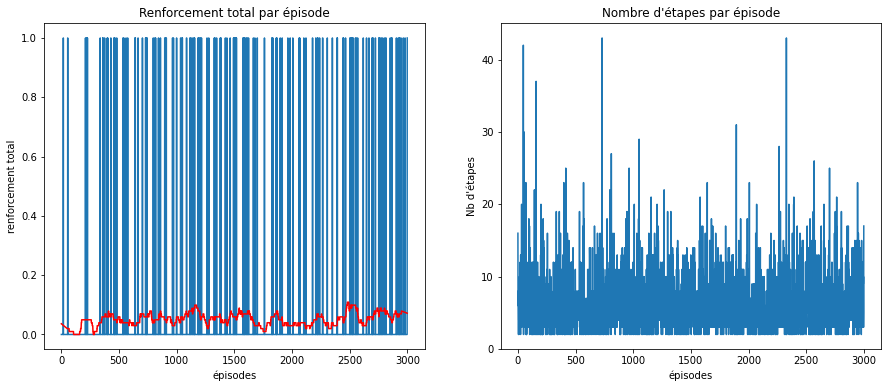

In [ ]:
res = monte_carlo(env, 0.9, 3000, epsilon0= 1, T = 100)

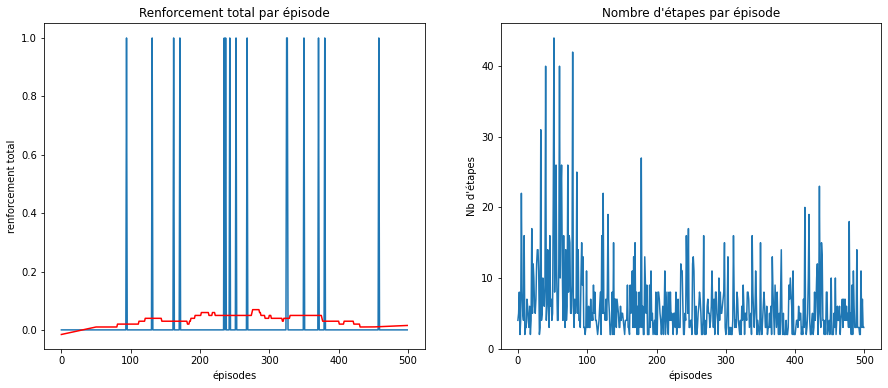

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 100)

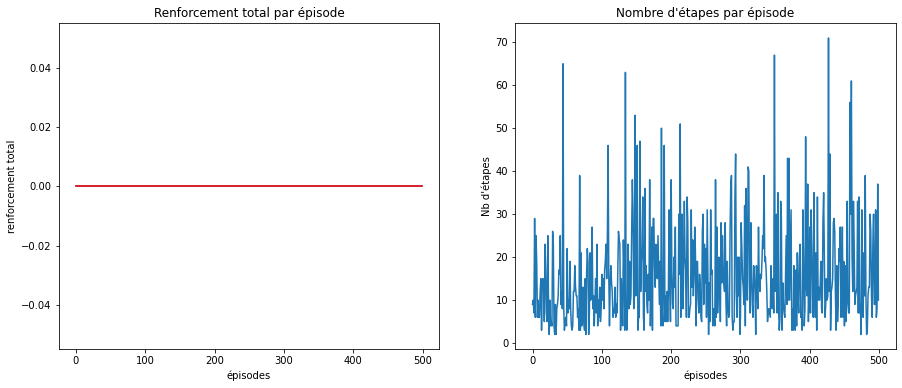

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.3, T = 100)

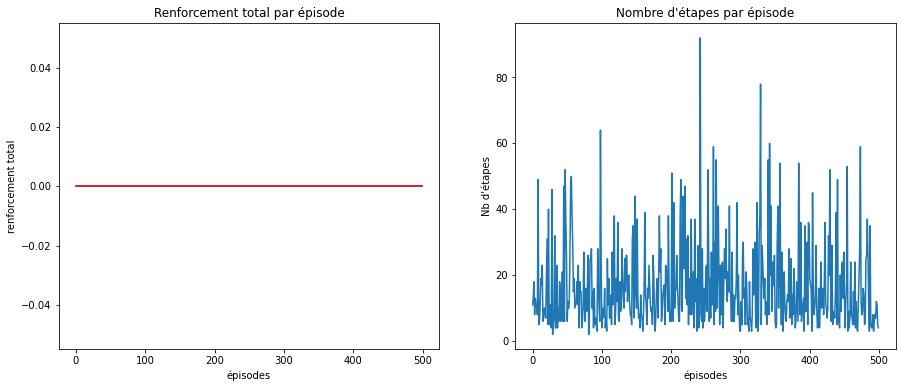

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.1, T = 100)

On fait maintenant varier T.

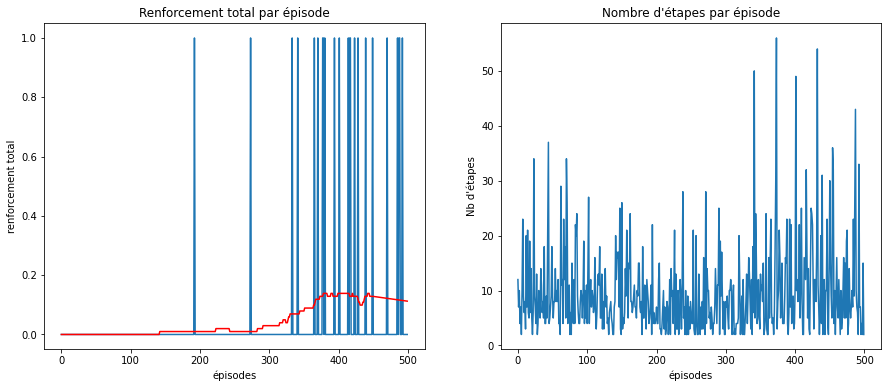

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 250)

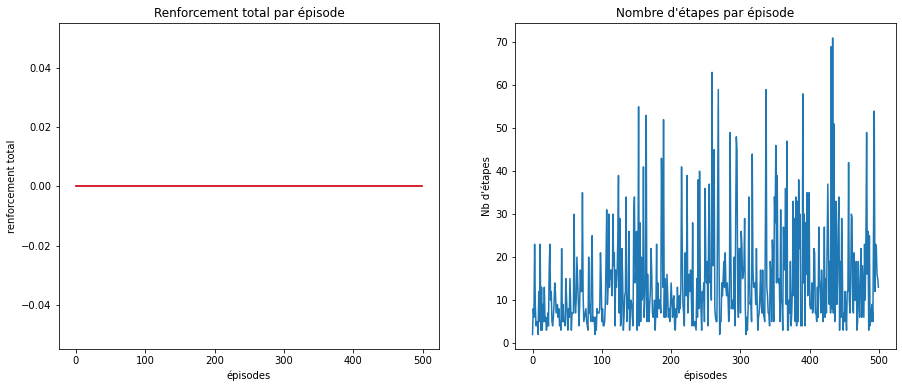

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 100)

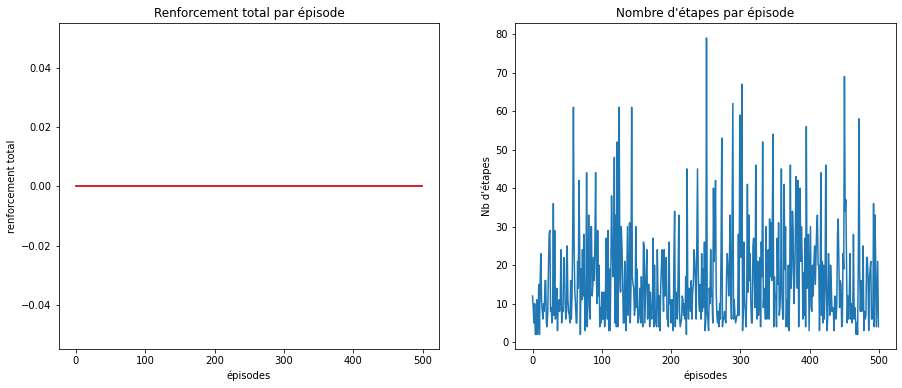

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 10)

#### SARSA

On fait varier epsilon0

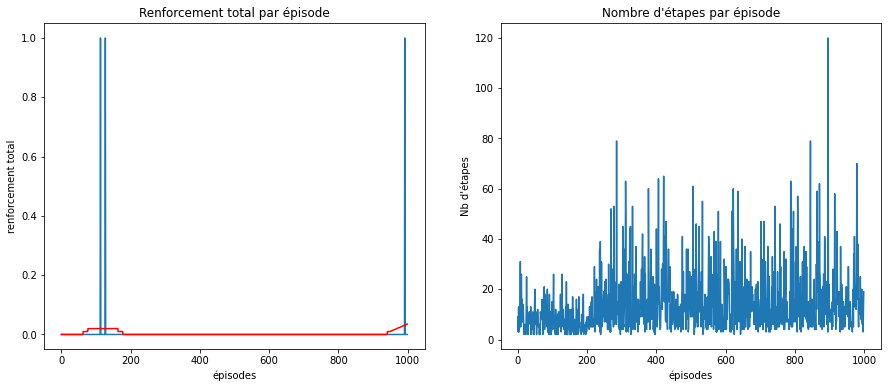

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=1, T=200)

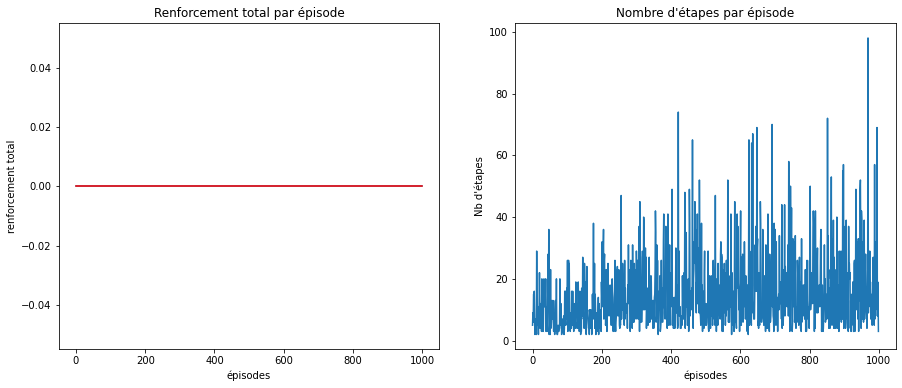

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=200)

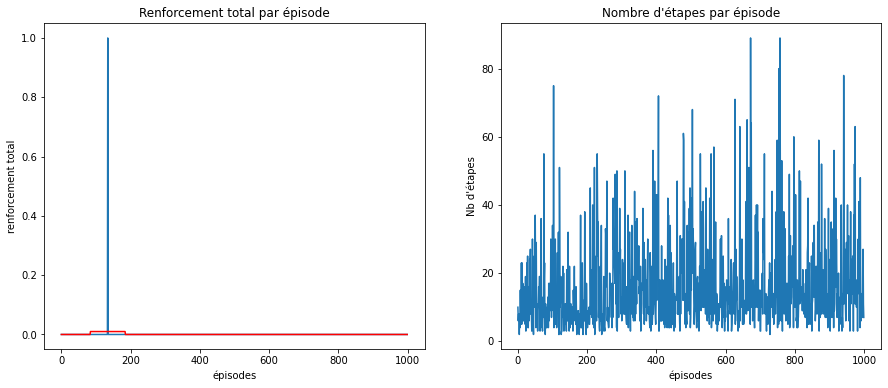

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.3, T=200)

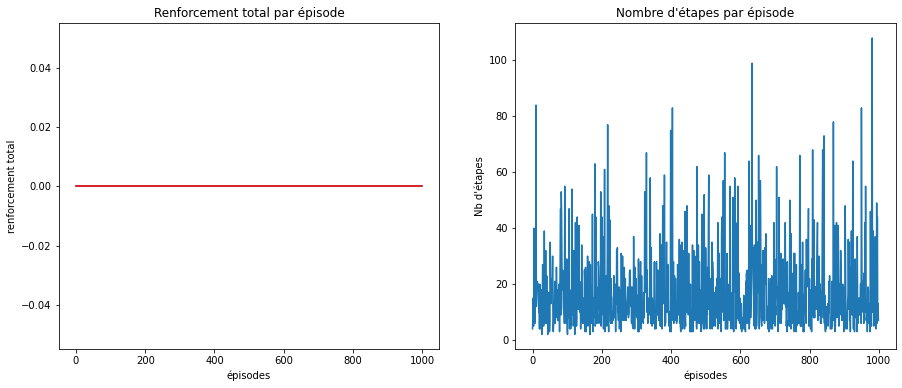

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.1, T=200)

On fait varier T

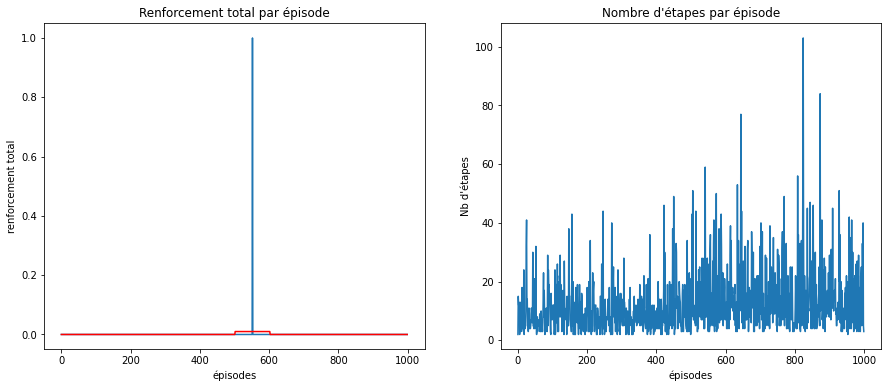

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=500)

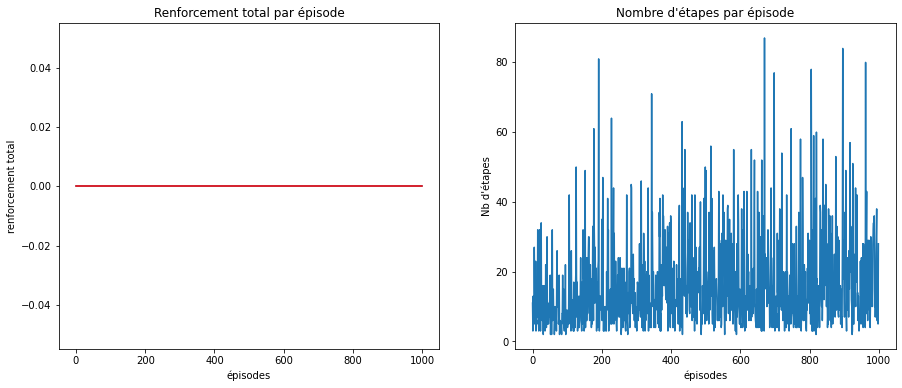

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=100)

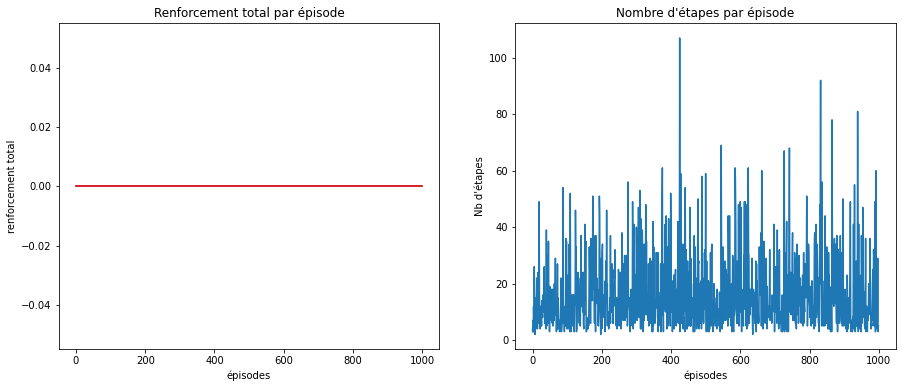

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=10)

#### Q-Learning

On fait varier epsilon0

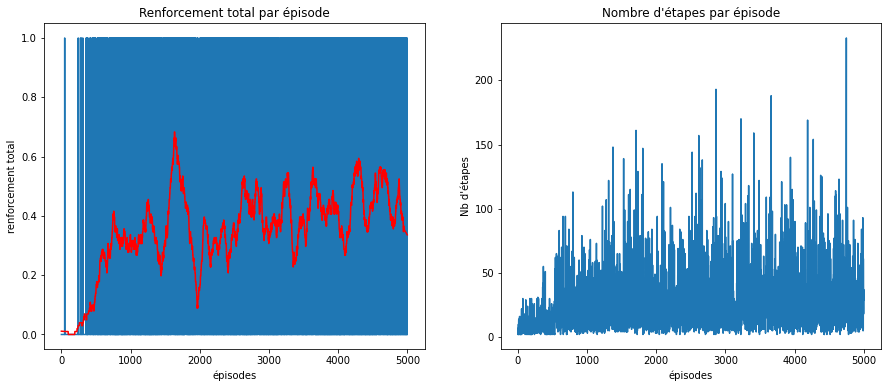

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, epsilon0=1, T=200)

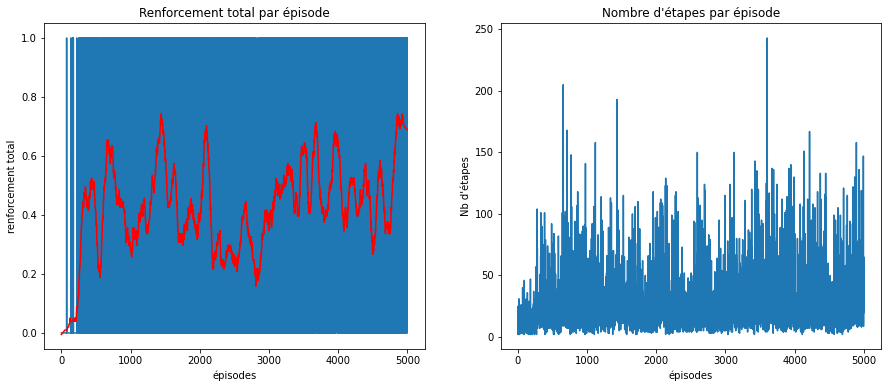

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, epsilon0=0.5, T=200)

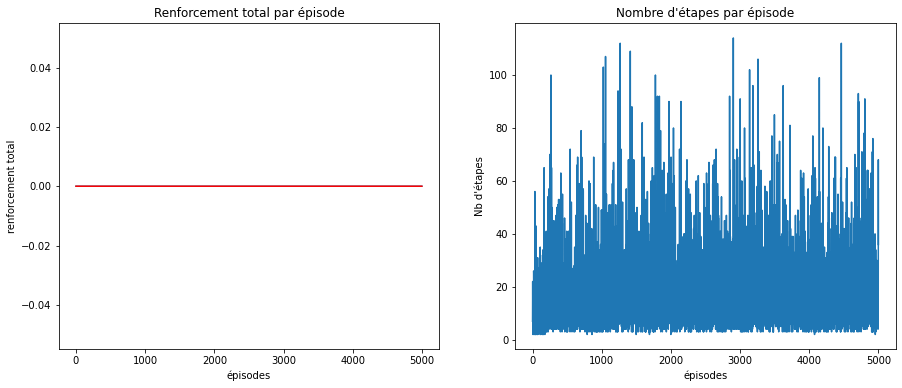

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, epsilon0=0.3, T=200)

On fait varier T

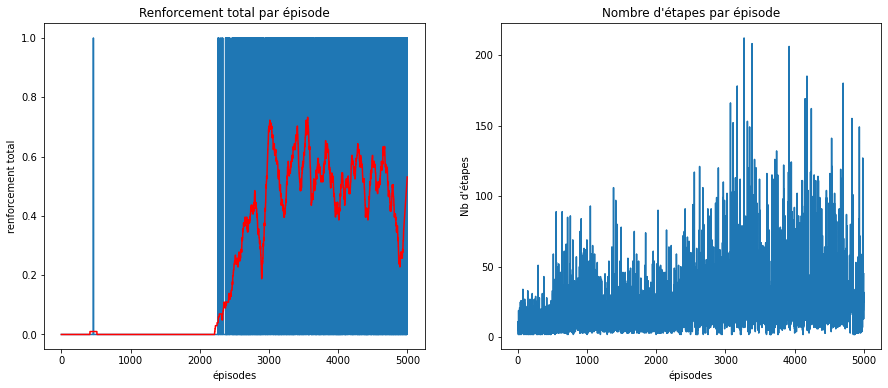

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, epsilon0=0.5, T=500)

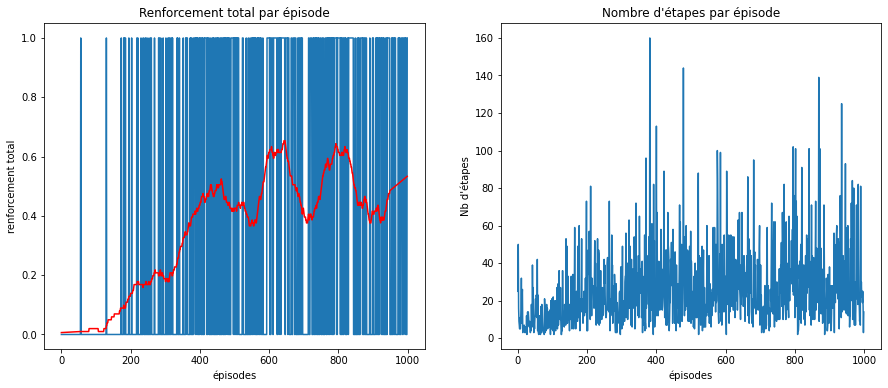

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=100)

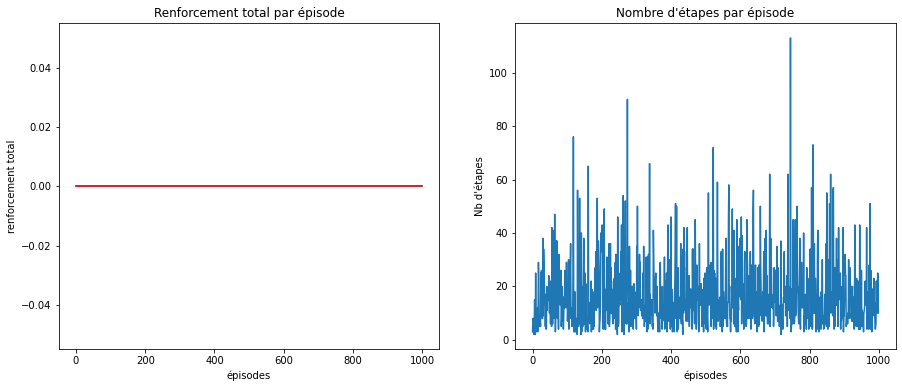

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=10)

Q-Learning s'en sort sensiblement mieux que SARSA ou MC Control. Cela est peut-être dû au fait que QL est plus "greedy" que SARSA via le max et que ça pourrait être avantageux dans ce contexte.

### Softmax

In [ ]:
from scipy.special import softmax

def softmax_policy(qvalues, T):
    return softmax(qvalues / T, axis=1)

def softmax_decision(qvalues, state, T):
    nb_actions = qvalues.shape[1]
    probs = softmax(qvalues[state] / T)
    return np.random.choice(nb_actions, p=probs)

Il faut redéfinir MC-Control, SARSA et Q-Learning

On choisit T = T0 / sqrt(t)

In [ ]:
import base
import numpy as np

def monte_carlo(env, gamma, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))

    list_reinforcements = []
    list_nb_etapes = []

    policy = np.ones((env.get_nb_states(), nba)) / nba

    for ne in range(nb_episodes):        
        state = env.reset()
        episode = []
        
        T = T0 / math.sqrt(ne + 1)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i += 1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            episode.append([state, action, r, nvstate])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        g = 0  # g le retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s, a]) / n[s, a]

        policy = softmax_policy(q, T)

    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def sarsa(env, gamma, alpha, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        T = T0 / math.sqrt(ne + 1)
        state = env.reset()
        action = softmax_decision(q, state, T)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = softmax_decision(q, nvstate, T)
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        T = T0 / math.sqrt(ne + 1)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = softmax_decision(q, state, T)
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

#### Monte-Carlo Control

On fait varier T0 la température initiale

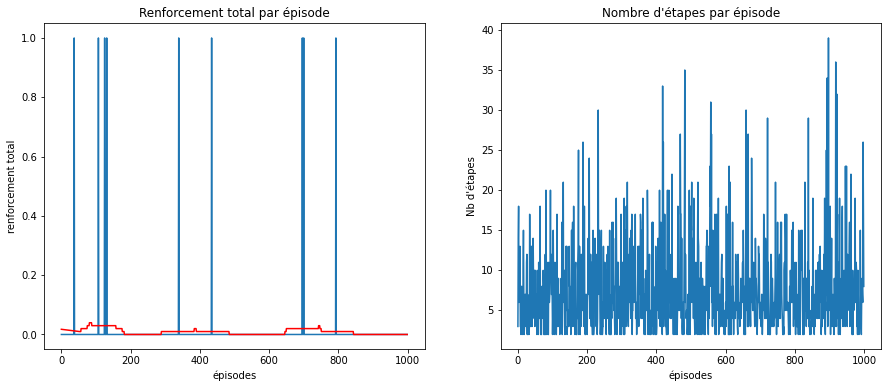

In [ ]:
res = monte_carlo(env, 0.9, 1000, T0=1000)

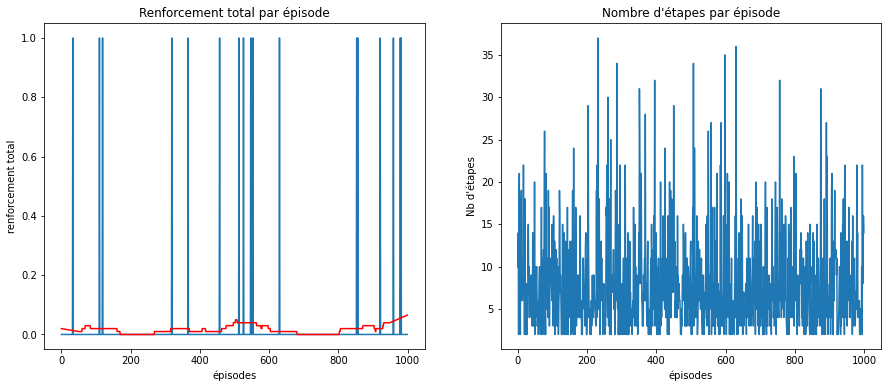

In [ ]:
res = monte_carlo(env, 0.9, 1000, T0=500)

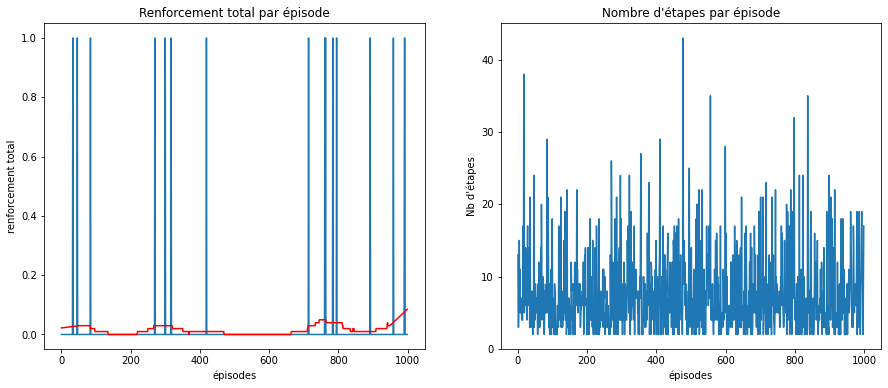

In [ ]:
res = monte_carlo(env, 0.9, 1000, T0=100)

#### SARSA

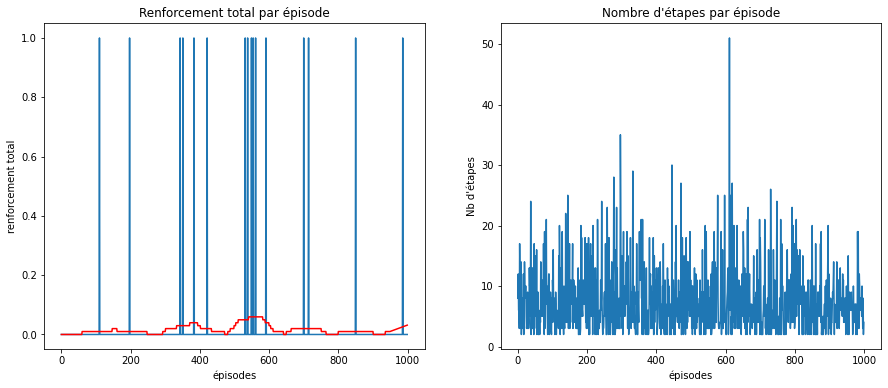

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=1000)

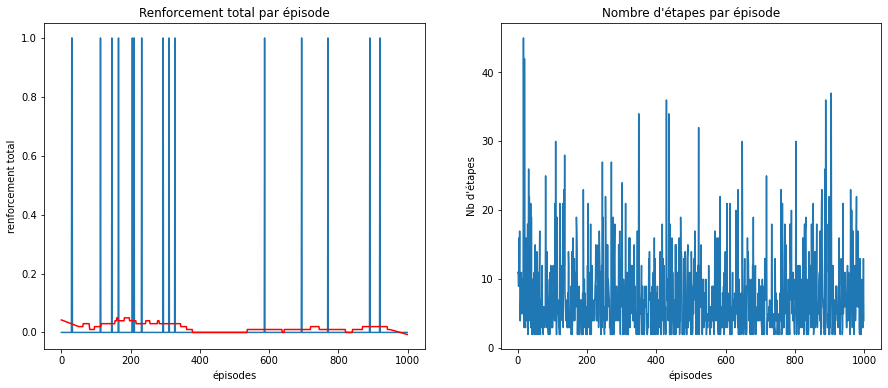

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=500)

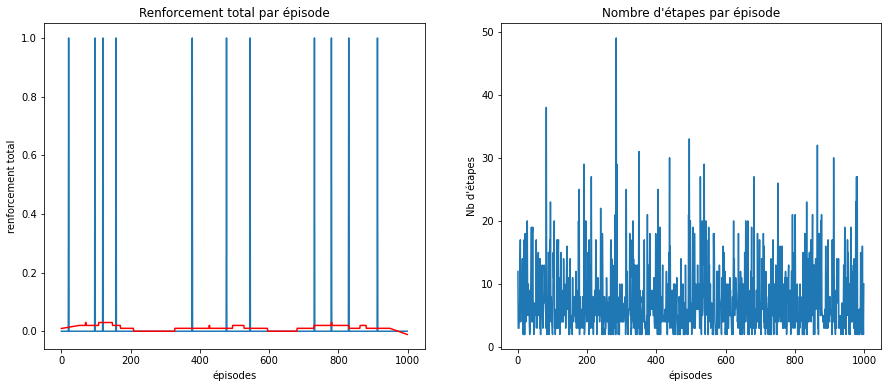

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=100)

#### Q-Learning

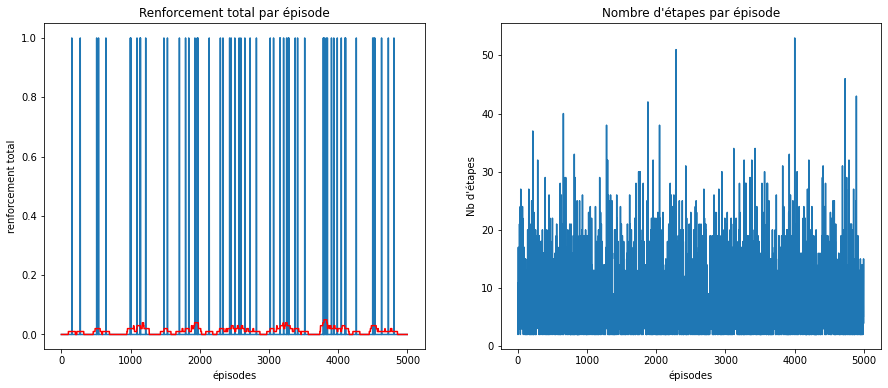

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, T0=1000)

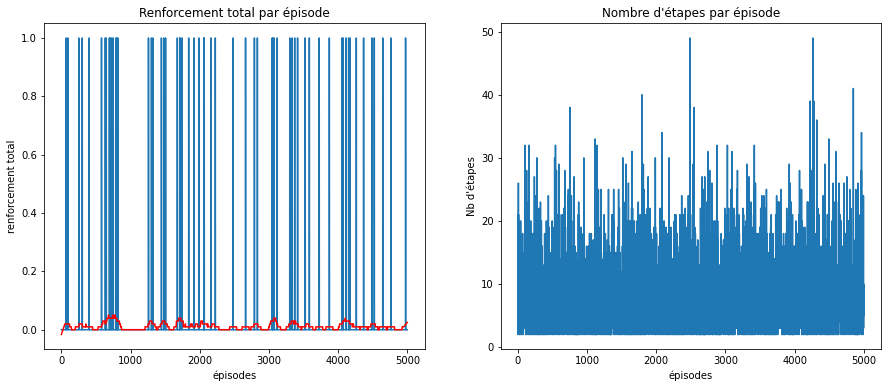

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, T0=500)

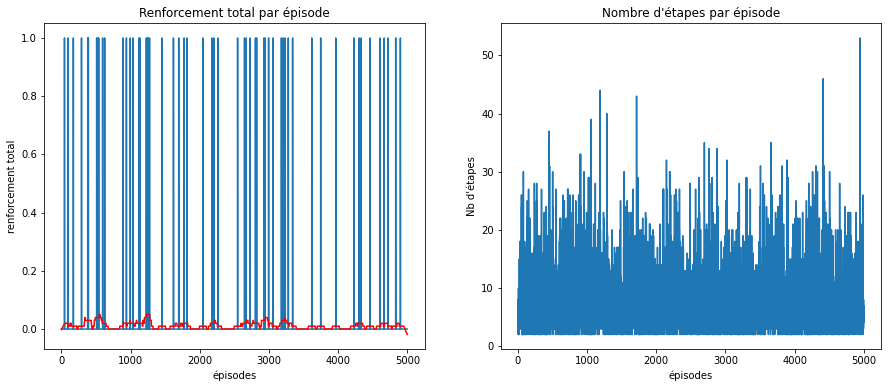

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, T0=100)

Q-Learning avec softmax fonctionne moins bien qu'avec epsilon-greedy

### Greedy avec une initialisation optimiste

On initialise les valeurs de q à Rmax / (1 - gamma)

In [ ]:
import base
import numpy as np

# Choisir quelle action faire en fct de l'etat
def greedy_decision(qvalues, state):
    return np.argmax(qvalues[state])


def sarsa(env, gamma, alpha, nb_episodes, rmax=1000):
    nba = env.get_nb_actions()
    q = np.full((env.get_nb_states(), nba), rmax / (1 - gamma))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        action = greedy_decision(q, state)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = greedy_decision(q, nvstate)
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, rmax=1000):
    nba = env.get_nb_actions()
    q = np.full((env.get_nb_states(), nba), rmax / (1 - gamma))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = greedy_decision(q, state)
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

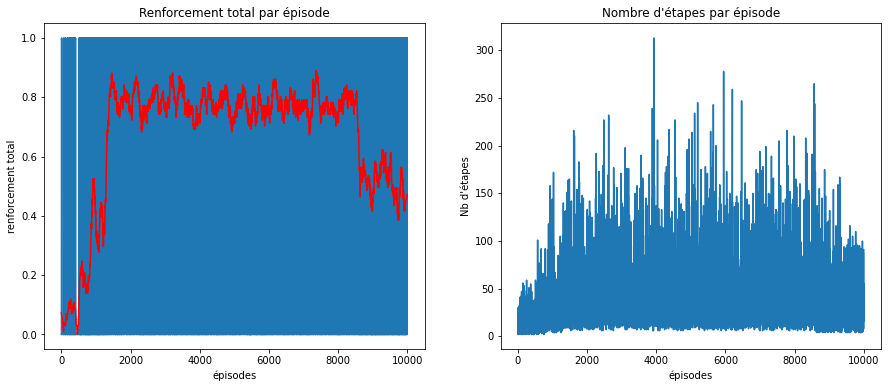

In [ ]:
res= sarsa(env, 0.9, 0.2, 10000, rmax=1)

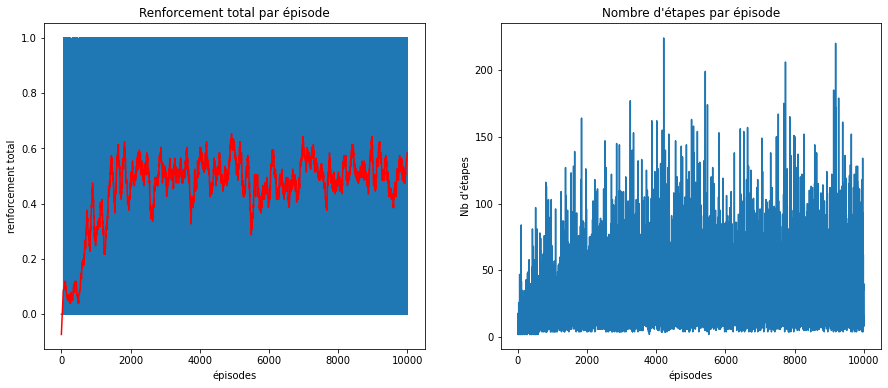

In [ ]:
res= qlearning(env, 0.9, 0.2, 10000, rmax=1)

Pour FrozenLake, avec l'initialisation optimiste, sarsa et qlearning ont du mal à converger mais les performances s'améliorent (en moyenne) au fur et à mesure des épisodes. Cela fonctionne en tout cas mieux que epsilon greedy ou softmax

## FoorRooms_Key

In [ ]:
env = base.FoorRooms_Key()

### Epsilon variable dans le temps

Définition de notre epsilon

In [ ]:
import math

def epsilon(t, epsilon0, T):
  if t <= T:
    return epsilon0

  return epsilon0 / math.sqrt(t - T)

Code pour les méthodes Monte-Carlo Control, SARSA, Q-Learning.

On introduit un nombre max d'actions par épisode pour SARSA et QL sinon le calcul pouvait mettre trop longtemps

In [ ]:
import base
import numpy as np

def greedy_policy(qvalues):
    policy = np.zeros(qvalues.shape)
    for s, va in enumerate(qvalues):
        policy[s ,np.argmax(va)] = 1
    return policy


def egreedy_policy(qvalues, epsilon):
    # qvalues matrice nb_etat * nb_actions
    nb_actions = qvalues.shape[1]
    policy = np.ones(qvalues.shape) * epsilon / nb_actions
    for s, va in enumerate(qvalues):
        policy[s, np.argmax(va)] += 1 - epsilon
    return policy


def egreedy_decision(qvalues, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, qvalues.shape[1])
    else:
        return np.argmax(qvalues[state])


def monte_carlo(env, gamma, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))

    list_reinforcements = []
    list_nb_etapes = []

    policy = np.ones((env.get_nb_states(), nba)) / nba

    for ne in range(nb_episodes):        
        state = env.reset()
        episode = []
        
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i += 1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            episode.append([state, action, r, nvstate])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        g = 0  #le retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s, a]) / n[s, a]

        policy = egreedy_policy(q, epsilon(ne, epsilon0, T))

    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def sarsa(env, gamma, alpha, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        action = egreedy_decision(q, state, epsilon(ne, epsilon0, T))
        tot_reinf = 0
        i = 0
        # on introduit une limite max aux nombre d'actions pour FoorRooms_Key
        while not env.is_final(state) and i <1000:
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = egreedy_decision(q, nvstate, epsilon(ne, epsilon0, T))
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, epsilon0, T):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        tot_reinf = 0
        i = 0
        while not env.is_final(state) and i < 1000:
            i +=1
            action = egreedy_decision(q, state, epsilon(ne, epsilon0, T))
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q


#### Monte-Carlo Control

On lance l'algorithme avec différentes valeurs de epsilon0.

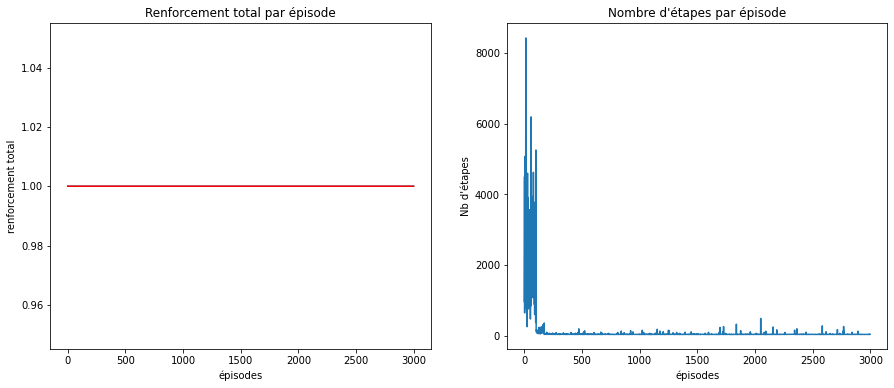

In [ ]:
res = monte_carlo(env, 0.9, 3000, epsilon0= 1, T = 100)

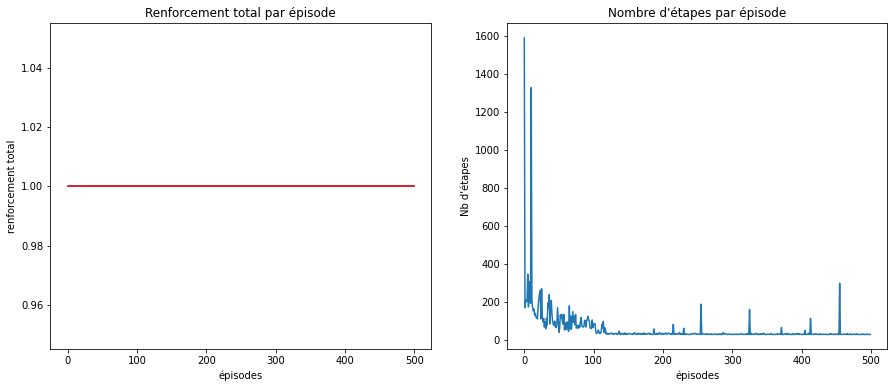

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 100)

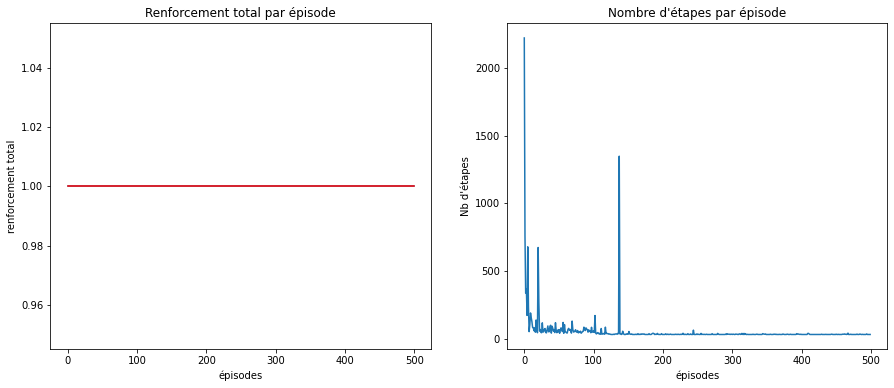

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.3, T = 100)

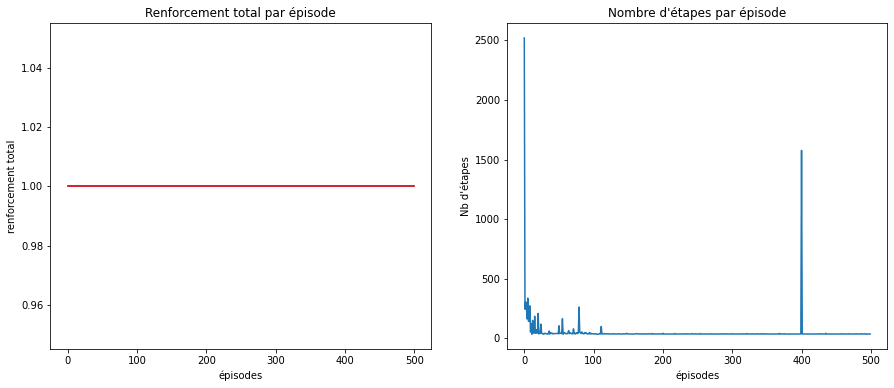

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.1, T = 100)

On fait maintenant varier T.

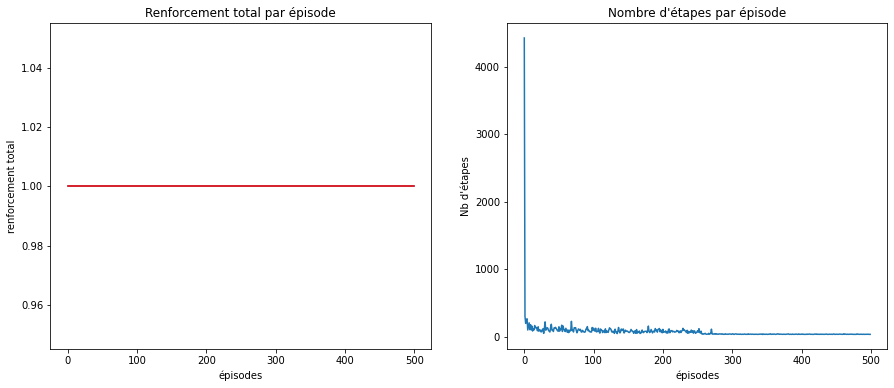

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 250)

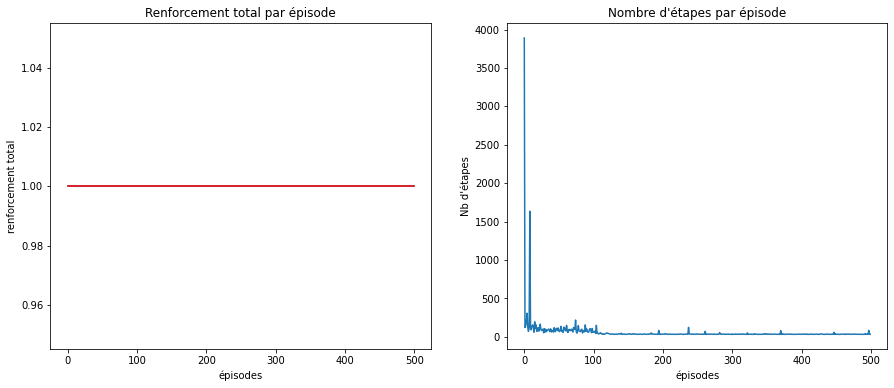

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 100)

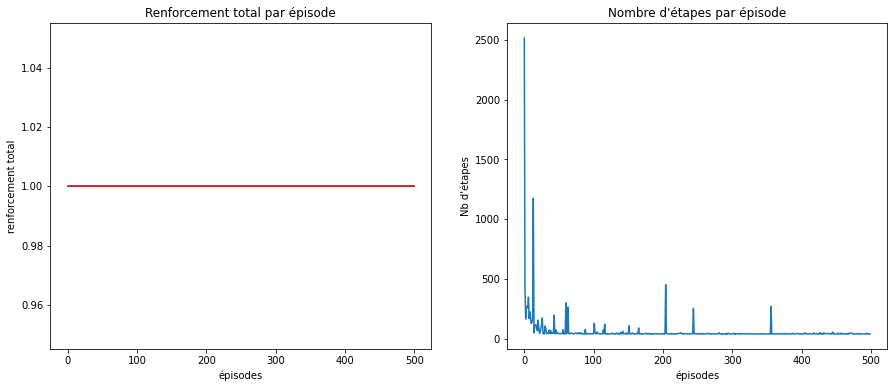

In [ ]:
res = monte_carlo(env, 0.9, 500, epsilon0= 0.5, T = 10)

Peut importe les paramètres de epsilon, on voit que MC Control converge très vite vers un nombre d'étapes faibles.

#### SARSA

On fait varier epsilon0

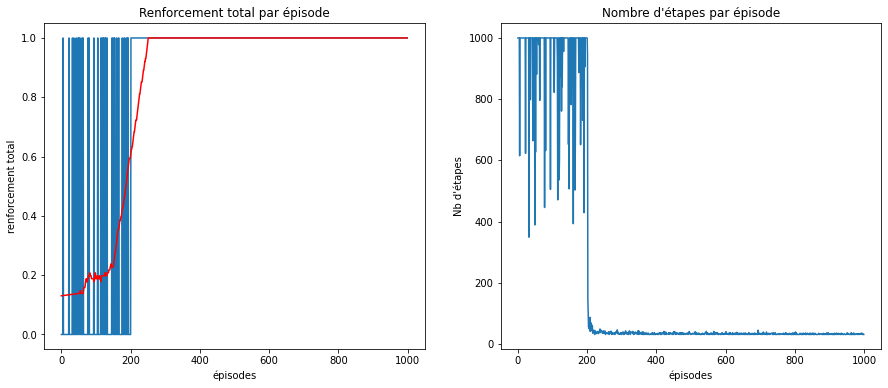

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=1, T=200)

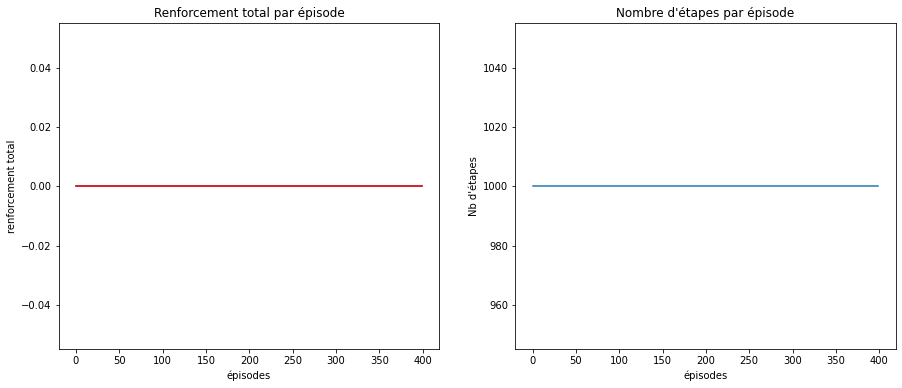

In [ ]:
res= sarsa(env, 0.9, 0.2, 400, epsilon0=0.6, T=200)

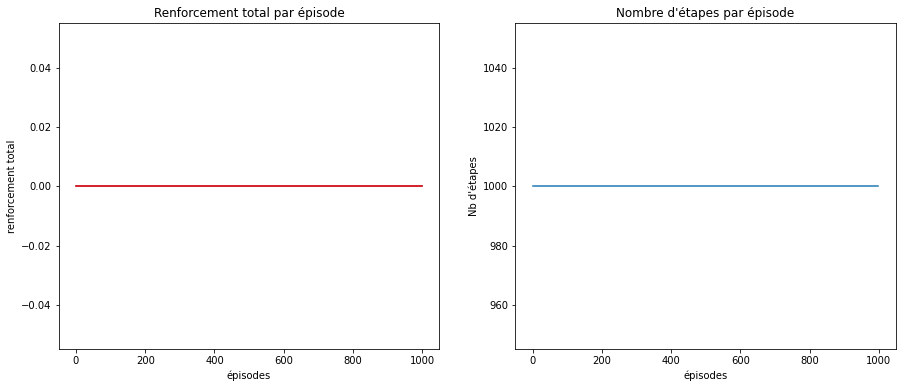

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.3, T=200)

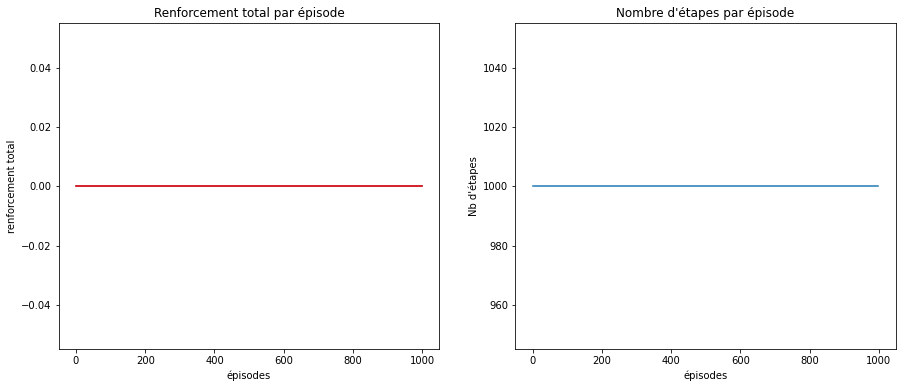

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.1, T=200)

On fait varier T

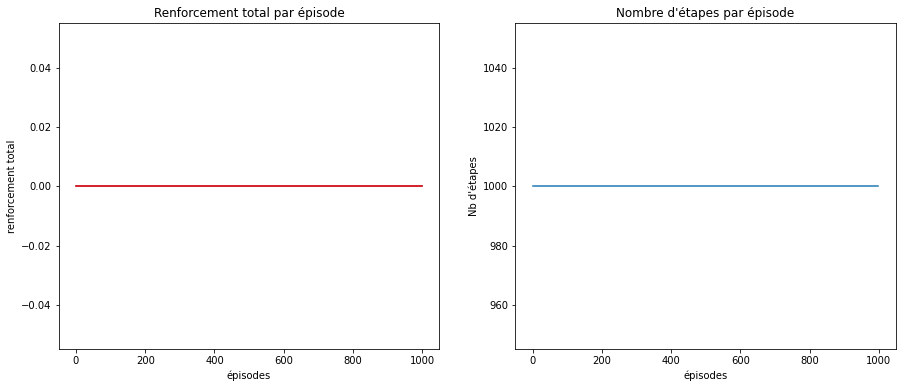

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=500)

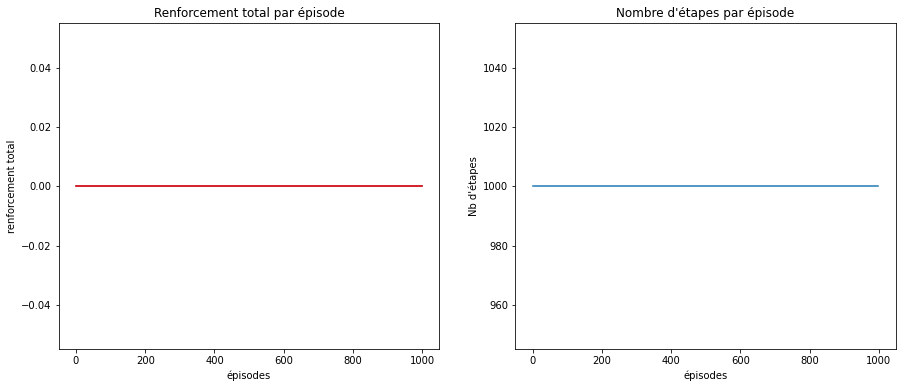

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=100)

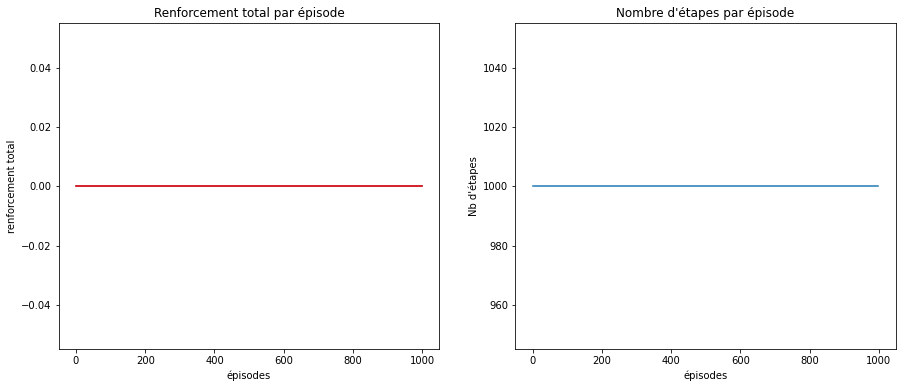

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, epsilon0=0.5, T=10)

#### Q-Learning

On fait varier epsilon0

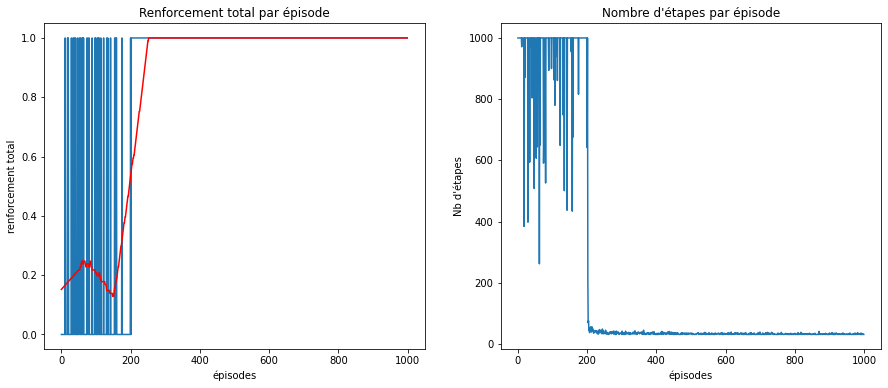

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=1, T=200)

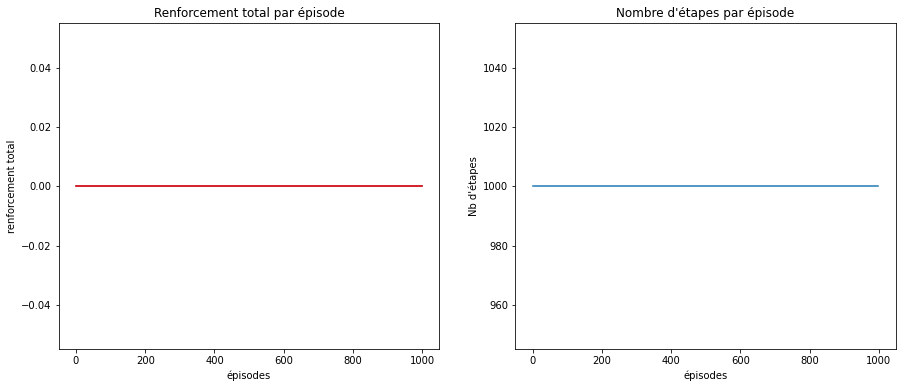

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=200)

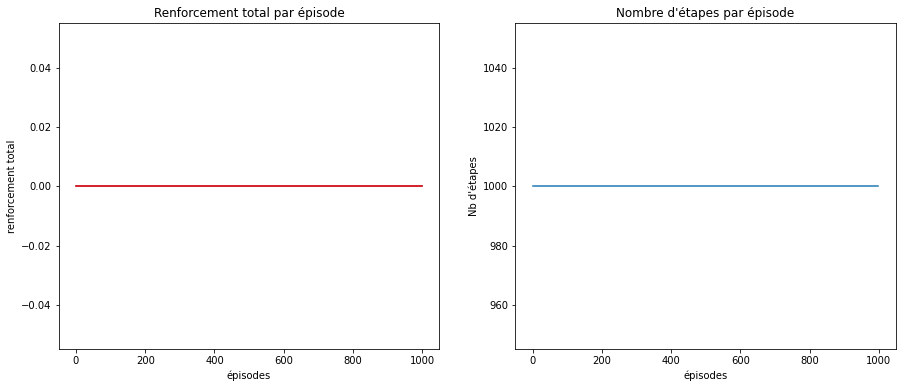

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.3, T=200)

On fait varier T

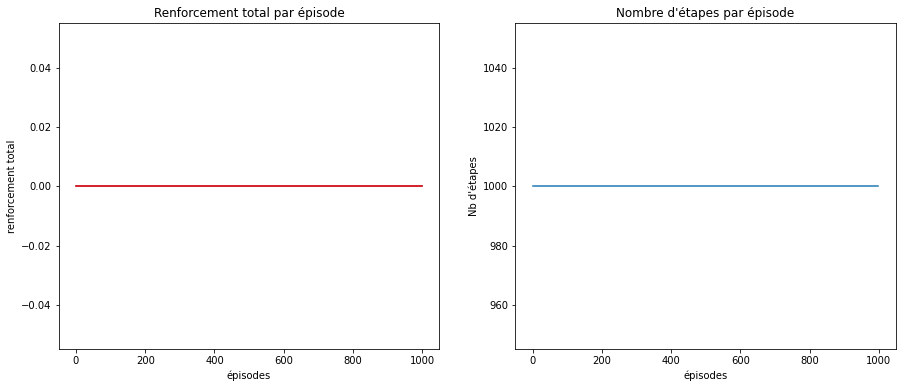

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=500)

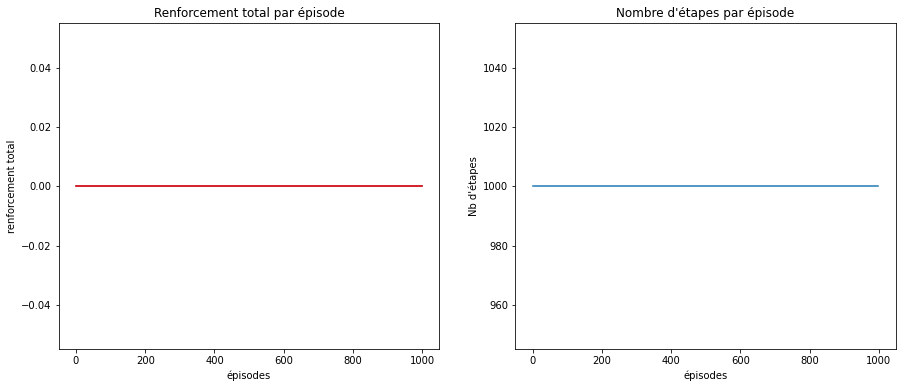

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=100)

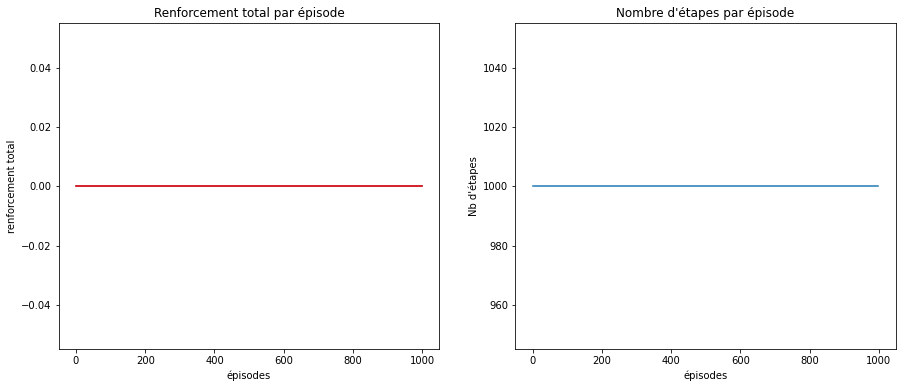

In [ ]:
res= qlearning(env, 0.9, 0.2, 1000, epsilon0=0.5, T=10)

Q-Learning s'en sort sensiblement mieux que SARSA ou MC Control. Cela est peut-être dû au fait que QL est plus "greedy" que SARSA via le max et que ça pourrait être avantageux dans ce contexte.

### Softmax

In [ ]:
from scipy.special import softmax

def softmax_policy(qvalues, T):
    return softmax(qvalues / T, axis=1)

def softmax_decision(qvalues, state, T):
    nb_actions = qvalues.shape[1]
    probs = softmax(qvalues[state] / T)
    return np.random.choice(nb_actions, p=probs)

Il faut redéfinir MC-Control, SARSA et Q-Learning

On choisit T = T0 / sqrt(t)

In [ ]:
import base
import numpy as np

def monte_carlo(env, gamma, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    n = np.zeros((env.get_nb_states(), nba))

    list_reinforcements = []
    list_nb_etapes = []

    policy = np.ones((env.get_nb_states(), nba)) / nba

    for ne in range(nb_episodes):        
        state = env.reset()
        episode = []
        
        T = T0 / math.sqrt(ne + 1)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i += 1
            action = np.random.choice(nba, p=policy[state])
            nvstate, r, _, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            episode.append([state, action, r, nvstate])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        g = 0  # g le retour
        for s, a, r, ns in reversed(episode):
            g = r + gamma * g
            n[s, a] += 1
            q[s, a] += (g - q[s, a]) / n[s, a]

        policy = softmax_policy(q, T)

    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def sarsa(env, gamma, alpha, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        T = T0 / math.sqrt(ne + 1)
        state = env.reset()
        action = softmax_decision(q, state, T)
        tot_reinf = 0
        i = 0
        while not env.is_final(state) and i < 1000:
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = softmax_decision(q, nvstate, T)
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, T0):
    nba = env.get_nb_actions()
    q = np.zeros((env.get_nb_states(), nba))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        T = T0 / math.sqrt(ne + 1)
        tot_reinf = 0
        i = 0
        while not env.is_final(state) and i < 1000:
            i +=1
            action = softmax_decision(q, state, T)
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

#### Monte-Carlo Control

On fait varier T0 la température initiale

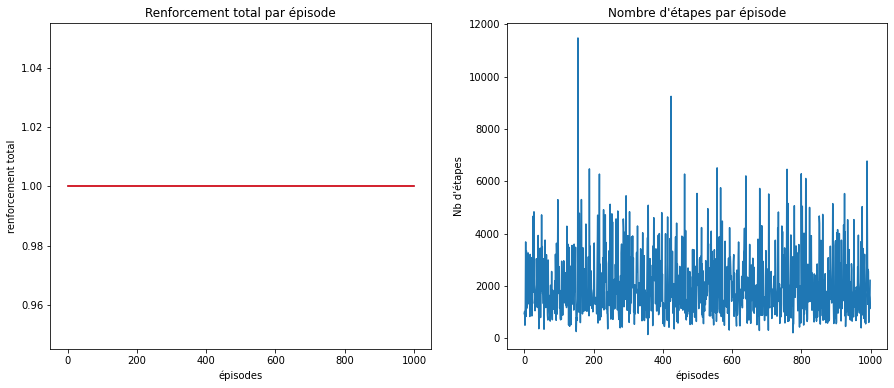

In [ ]:
res = monte_carlo(env, 0.9, 1000, T0=1000)

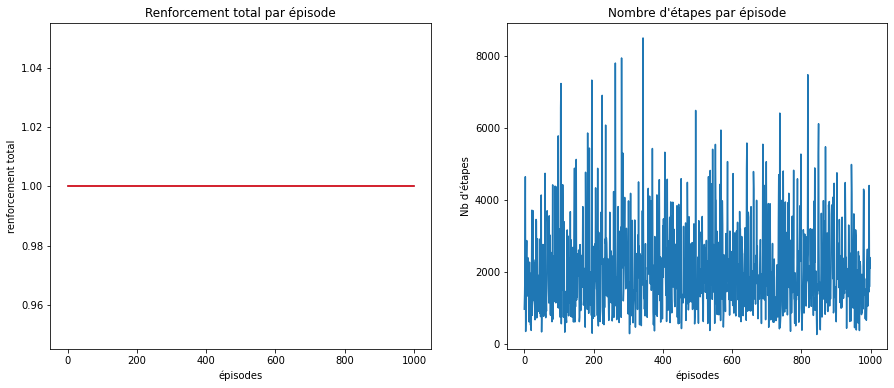

In [ ]:
res = monte_carlo(env, 0.9, 1000, T0=500)

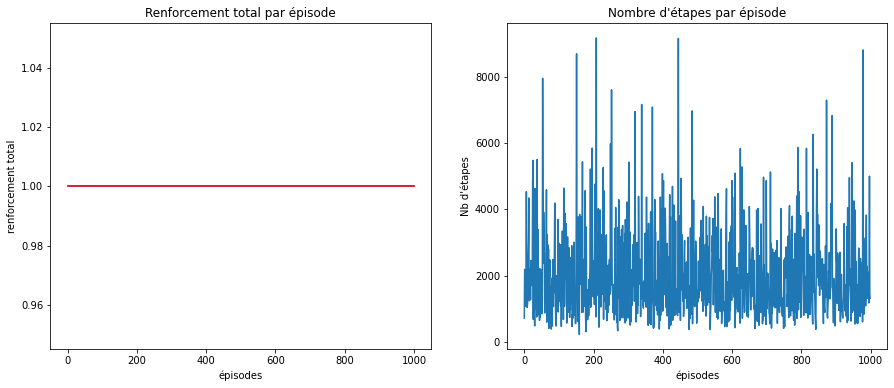

In [ ]:
res = monte_carlo(env, 0.9, 1000, T0=100)

#### SARSA

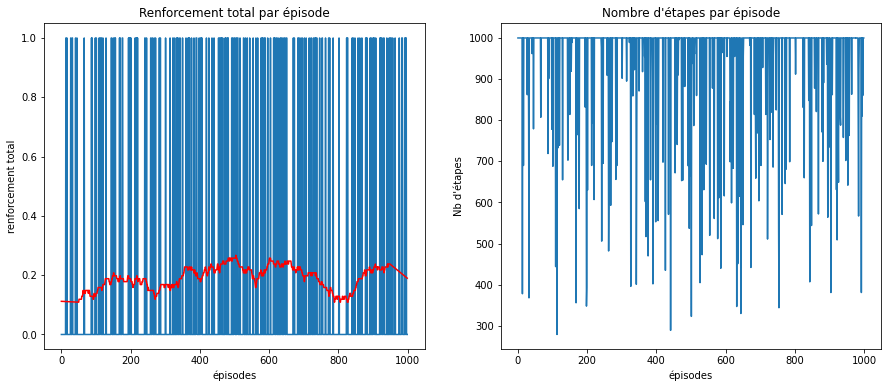

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=1000)

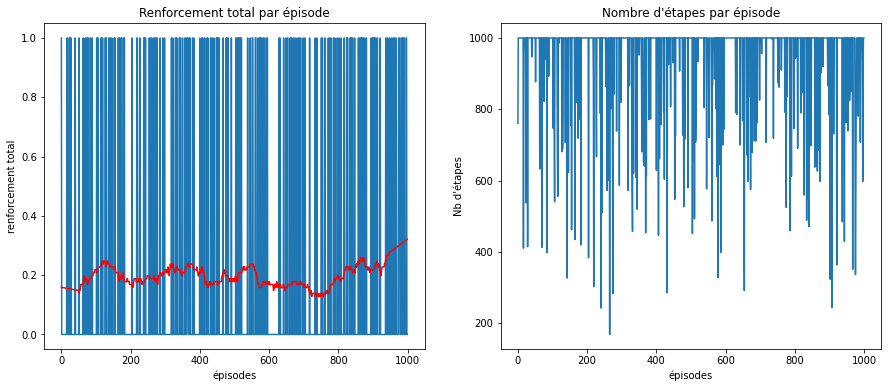

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=500)

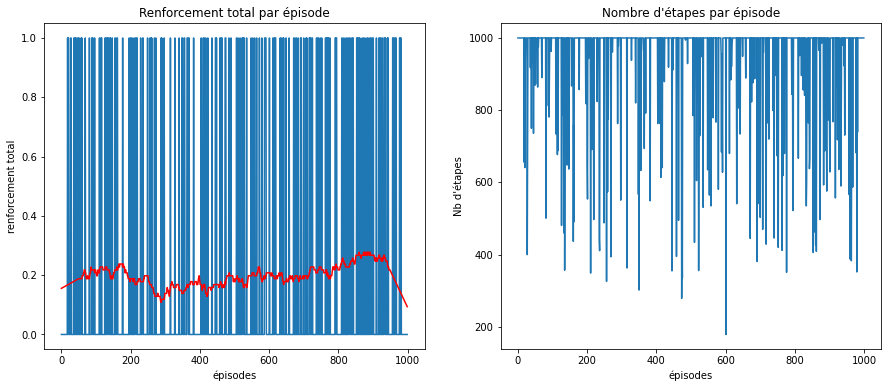

In [ ]:
res= sarsa(env, 0.9, 0.2, 1000, T0=100)

#### Q-Learning

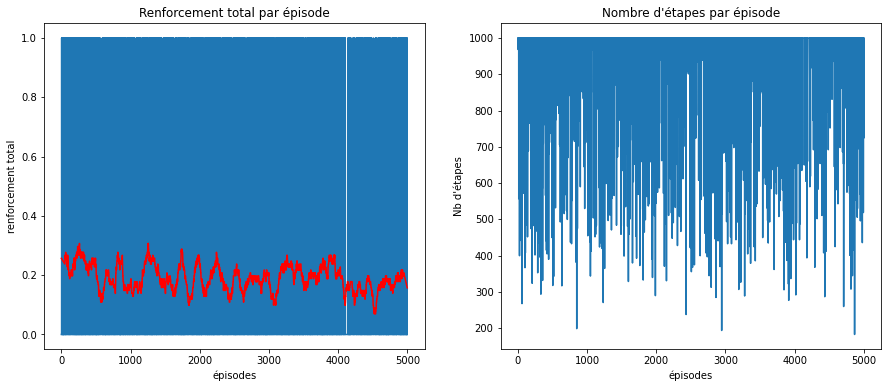

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, T0=1000)

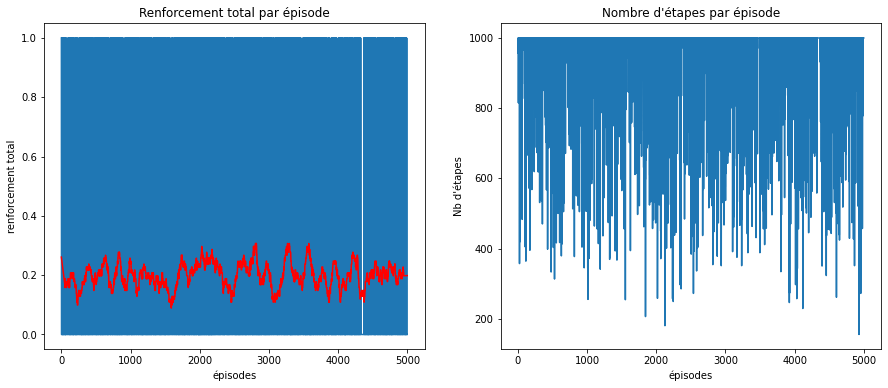

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, T0=500)

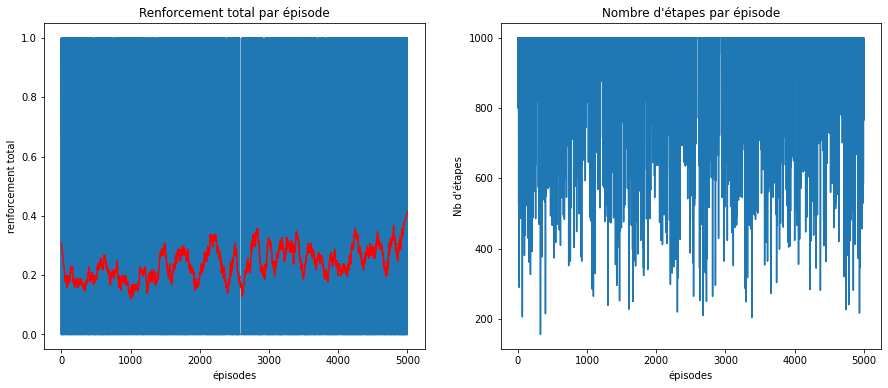

In [ ]:
res= qlearning(env, 0.9, 0.2, 5000, T0=100)

Q-Learning avec softmax n'arrive pas à converger. Cela est peut-être dû à la restriction sur le nombre maximal d'étapes mais sinon le temps de calcul devenait extrêmement long.

### Greedy avec une initialisation optimiste

On initialise les valeurs de q à Rmax / (1 - gamma)

In [ ]:
import base
import numpy as np

# Choisir quelle action faire en fct de l'etat
def greedy_decision(qvalues, state):
    return np.argmax(qvalues[state])


def sarsa(env, gamma, alpha, nb_episodes, rmax=1000):
    nba = env.get_nb_actions()
    q = np.full((env.get_nb_states(), nba), rmax / (1 - gamma))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        action = greedy_decision(q, state)
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            nvaction = greedy_decision(q, nvstate)
            if final:
                target = r
            else:
                target = r + gamma * q[nvstate, nvaction]

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate
            action = nvaction

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
        
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

def qlearning(env, gamma, alpha, nb_episodes, rmax=1000):
    nba = env.get_nb_actions()
    q = np.full((env.get_nb_states(), nba), rmax / (1 - gamma))
    list_reinforcements = []
    list_nb_etapes = []

    for ne in range(nb_episodes):
        state = env.reset()
        tot_reinf = 0
        i = 0
        while not env.is_final(state):
            i +=1
            action = greedy_decision(q, state)
            nvstate, r, final, _ = env.step(action)
            if (r > 0):
                tot_reinf += r
            if final:
                target = r
            else:
                target = r + gamma * np.max(q[nvstate])

            q[state, action] += alpha * (target - q[state, action])
            state = nvstate

        list_reinforcements.append(tot_reinf)
        list_nb_etapes.append(i)
            
    plot_episodes(list_reinforcements, list_nb_etapes)
    return q

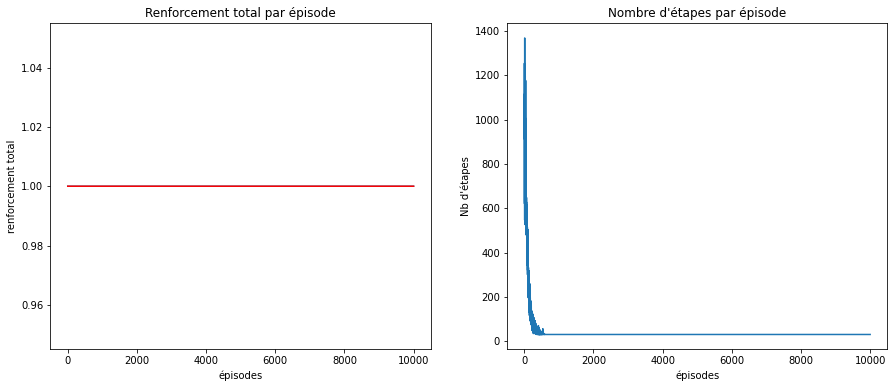

In [ ]:
res= sarsa(env, 0.9, 0.2, 10000, rmax=1)

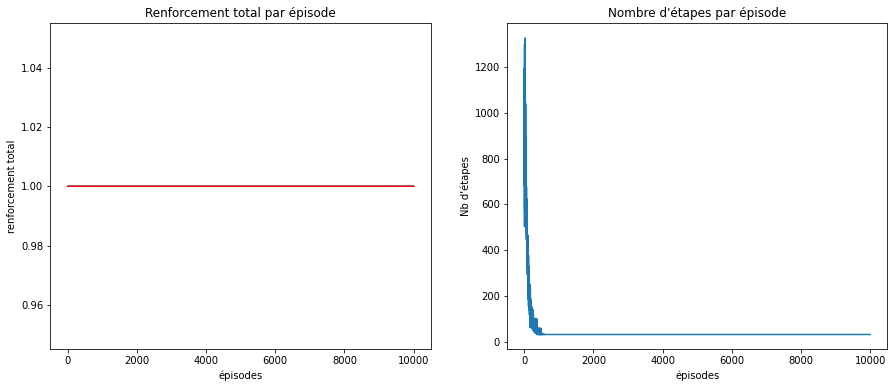

In [ ]:
res= qlearning(env, 0.9, 0.2, 10000, rmax=1)

Pour FoorRooms_key, avec l'initialisation optimiste, sarsa et qlearning convergent très vite vers un nombre d'étapes faible.

## Conclusion Partie Contrôle

MC Control converge généralement plus vite que Q-Learning et SARSA. 

Le softmax ne donne pas de résultats très différents de l'epsilon variable.

L'initialisation optimiste donne de bons résultats dans les 3 environnements différents.